# **Analisis de series temprales en la atención al público**

In [89]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

# Modulo para uso exclusivo a partir de aqui
from statsmodels.graphics.tsaplots import plot_acf #funcion de autocorrelacion
from statsmodels.tsa.stattools import acf #funcion de autocorrelacion


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import ADFTest
from matplotlib import pyplot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima, ndiffs, nsdiffs
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from datetime import timedelta
import statsmodels.api as sm
from matplotlib.collections import PolyCollection

In [90]:
# Lee el archivo Excel en un DataFrame de pandas
data = pd.read_excel("ST_ATENCION1.xlsx")

# Ahora puedes trabajar con los datos en el DataFrame
print(data.head())

       FECHA  CC  WAPP  TP  TAD  PP
0 2022-01-03  45     0  37   31   4
1 2022-01-04  63     0  24   24   5
2 2022-01-05  63     0  39   18  12
3 2022-01-06  71     0  33   26   5
4 2022-01-07  58     0  29    9   6


In [91]:
data.dtypes

FECHA    datetime64[ns]
CC                int64
WAPP              int64
TP                int64
TAD               int64
PP                int64
dtype: object

In [92]:
data.set_index("FECHA", inplace=True) #el inplace=True es importante para que guarde los cambios en el dataset
data.head()

CC  WAPP  TP  TAD  PP
FECHA                            
2022-01-03  45     0  37   31   4
2022-01-04  63     0  24   24   5
2022-01-05  63     0  39   18  12
2022-01-06  71     0  33   26   5
2022-01-07  58     0  29    9   6

In [93]:
data.isna().sum()

CC      0
WAPP    0
TP      0
TAD     0
PP      0
dtype: int64

---
### **Graficamos la serie temporal**

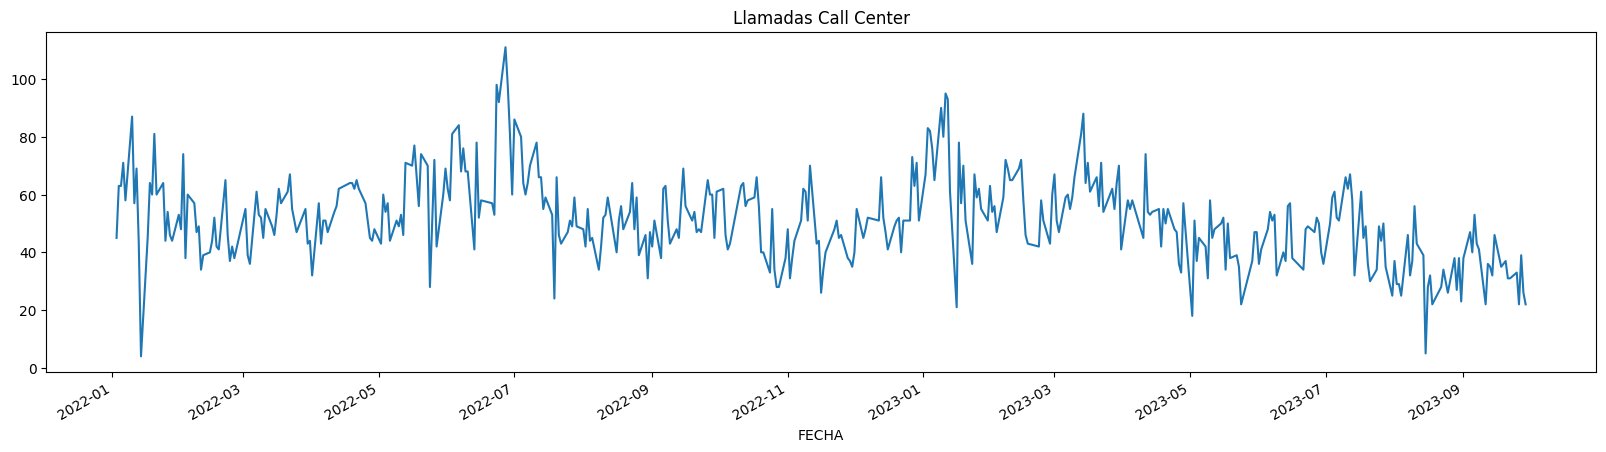

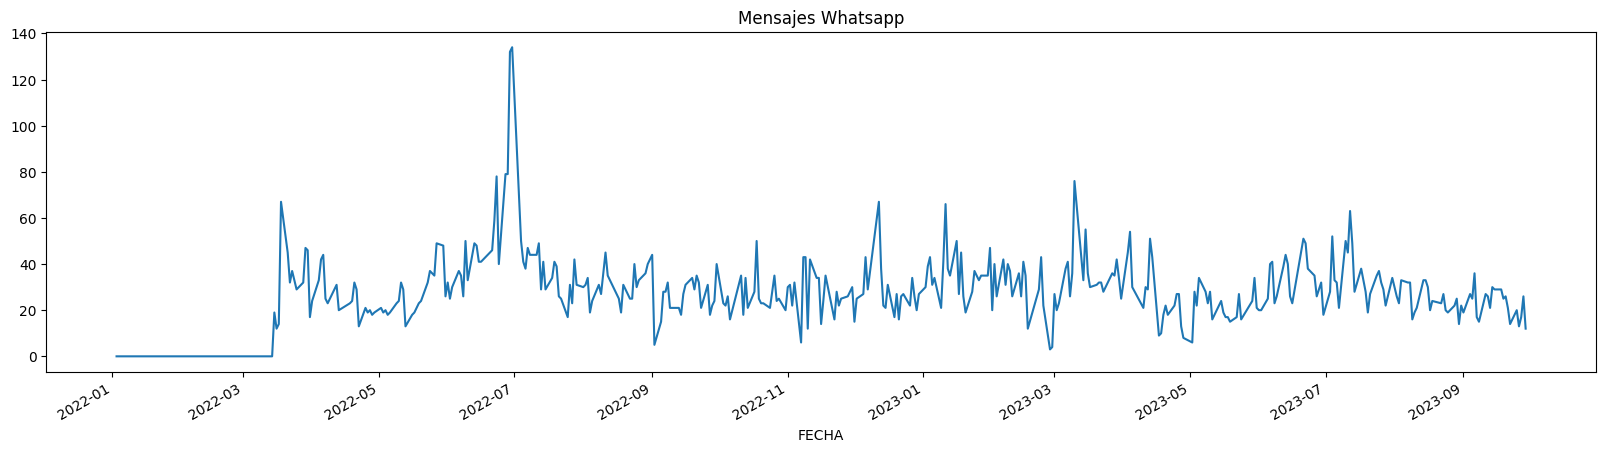

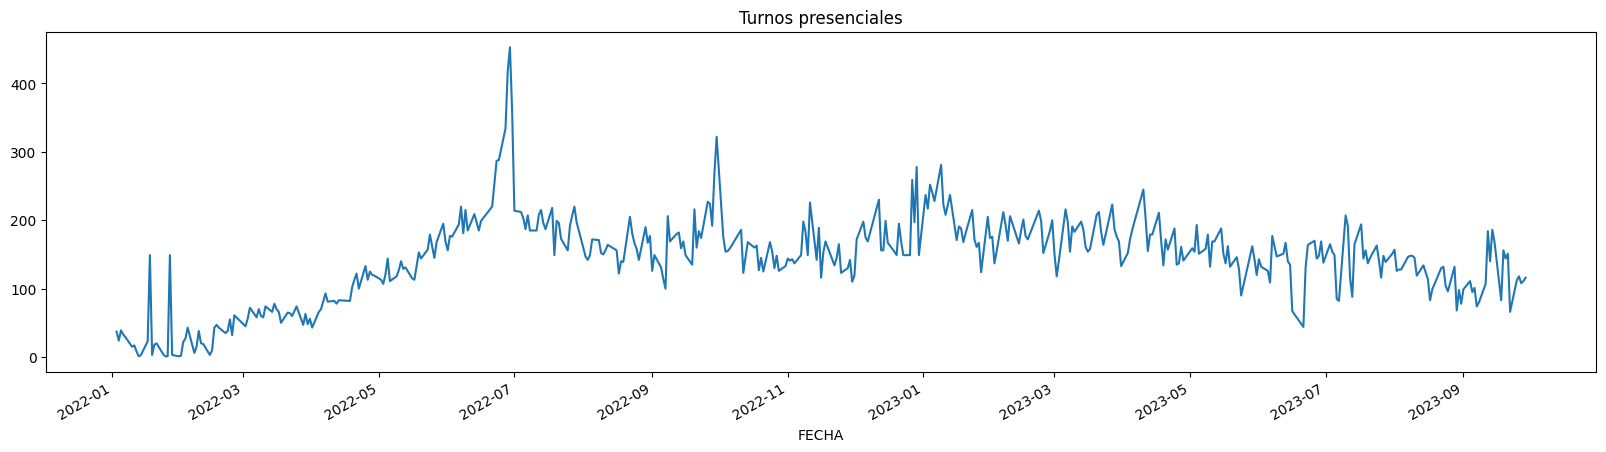

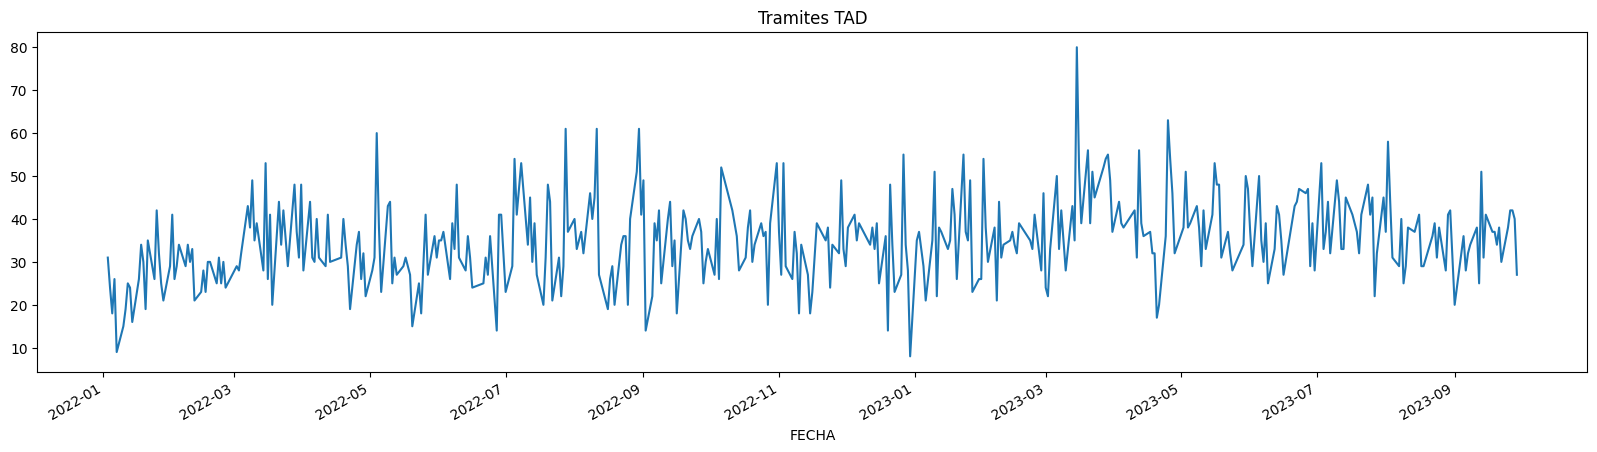

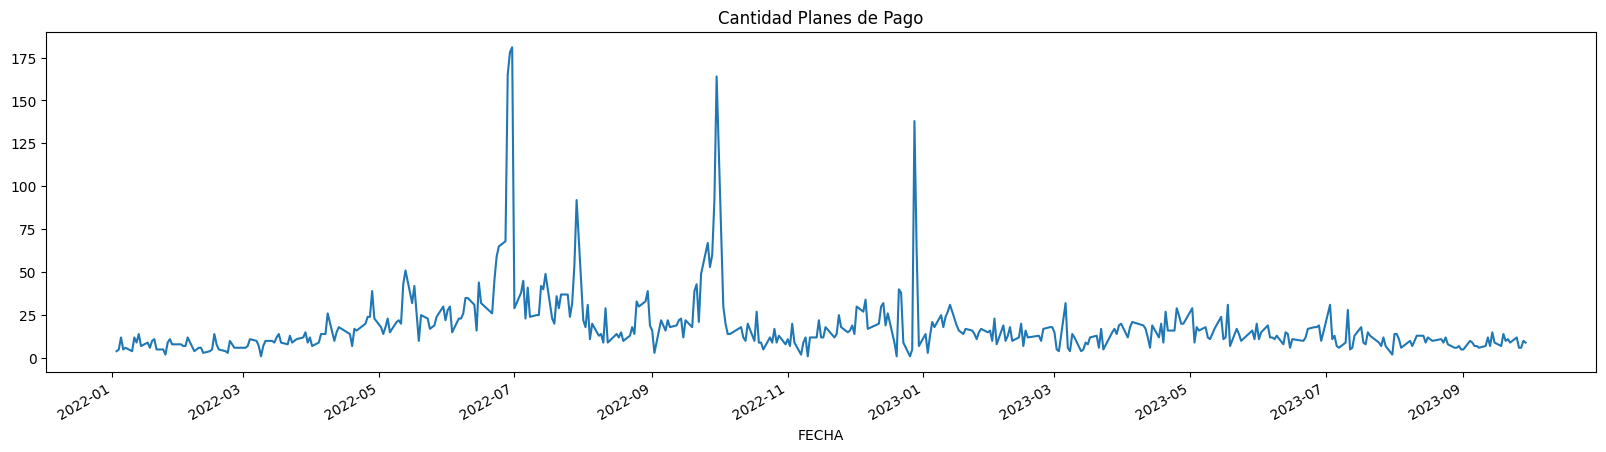

In [94]:
data.CC.plot(figsize=(20,5), title = "Llamadas Call Center")
plt.show()
data.WAPP.plot(figsize=(20,5), title = "Mensajes Whatsapp")
plt.show()
data.TP.plot(figsize=(20,5), title = "Turnos presenciales")
plt.show()
data.TAD.plot(figsize=(20,5), title = "Tramites TAD")
plt.show()
data.PP.plot(figsize=(20,5), title = "Cantidad Planes de Pago")
plt.show()

---
### **Representación gráfica de la Función de Autocorrelación**

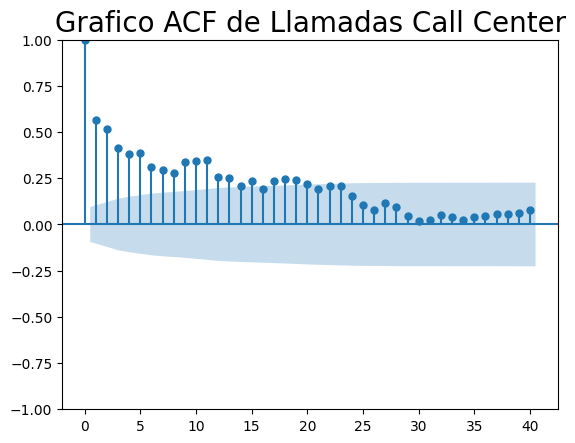

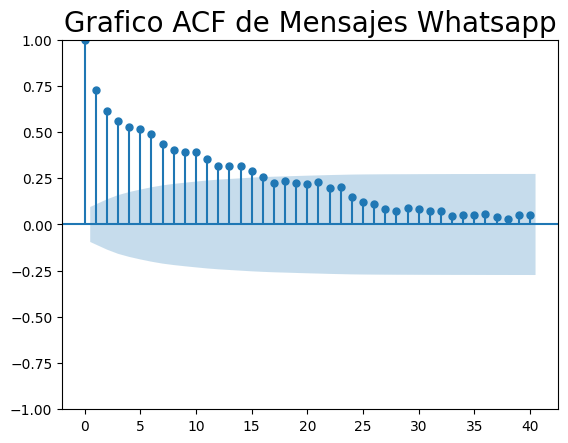

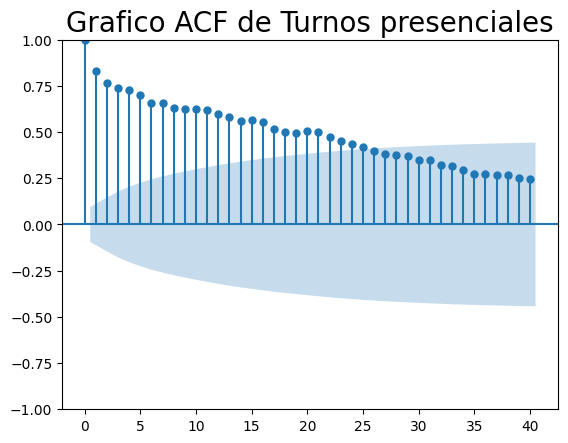

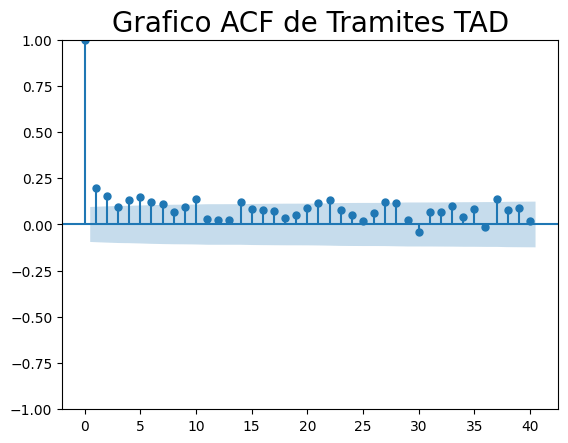

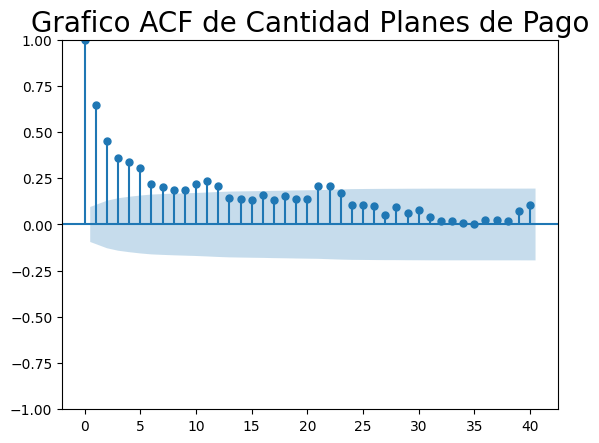

In [95]:
plot_acf(data.CC, lags=40)
plt.title("Grafico ACF de Llamadas Call Center", size= 20)
plt.show()

plot_acf(data.WAPP, lags=40)
plt.title("Grafico ACF de Mensajes Whatsapp", size= 20)
plt.show()

plot_acf(data.TP, lags=40)
plt.title("Grafico ACF de Turnos presenciales", size= 20)
plt.show()

plot_acf(data.TAD, lags=40)
plt.title("Grafico ACF de Tramites TAD", size= 20)
plt.show()

plot_acf(data.PP, lags=40)
plt.title("Grafico ACF de Cantidad Planes de Pago", size= 20)
plt.show()

---
---
---

---
### **Graficamos la serie temporal**

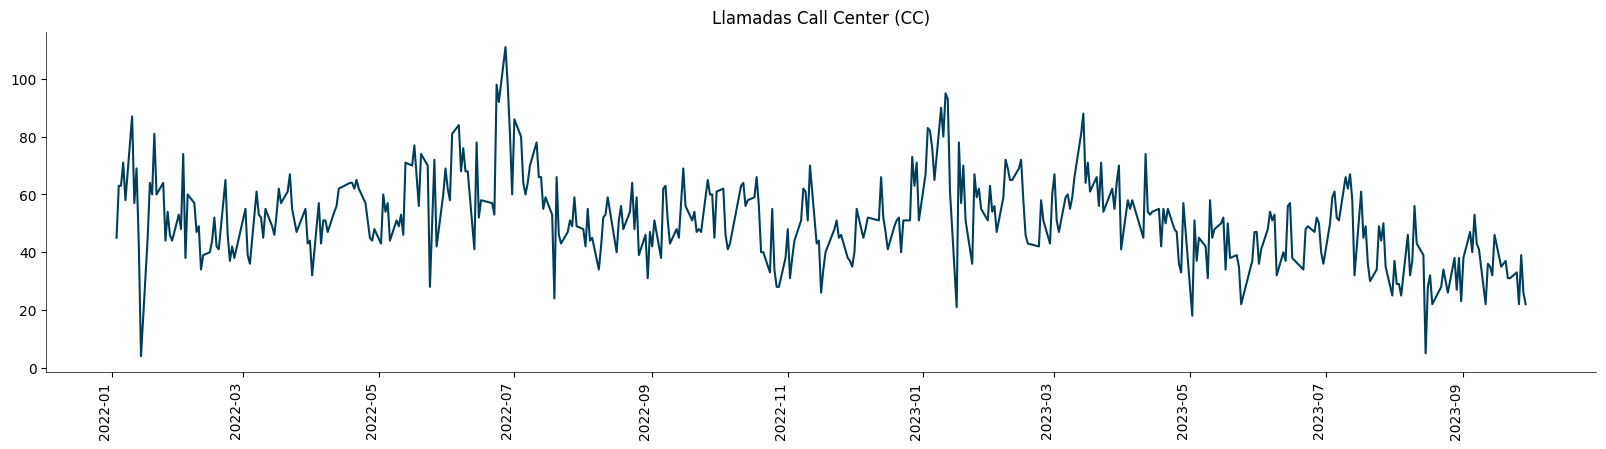

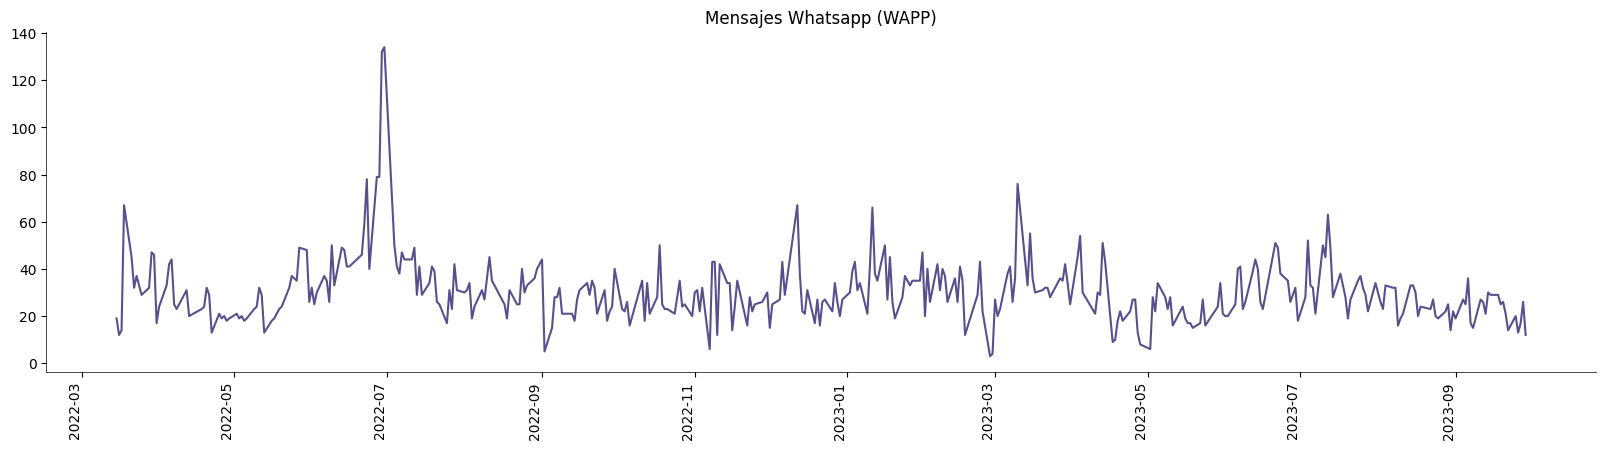

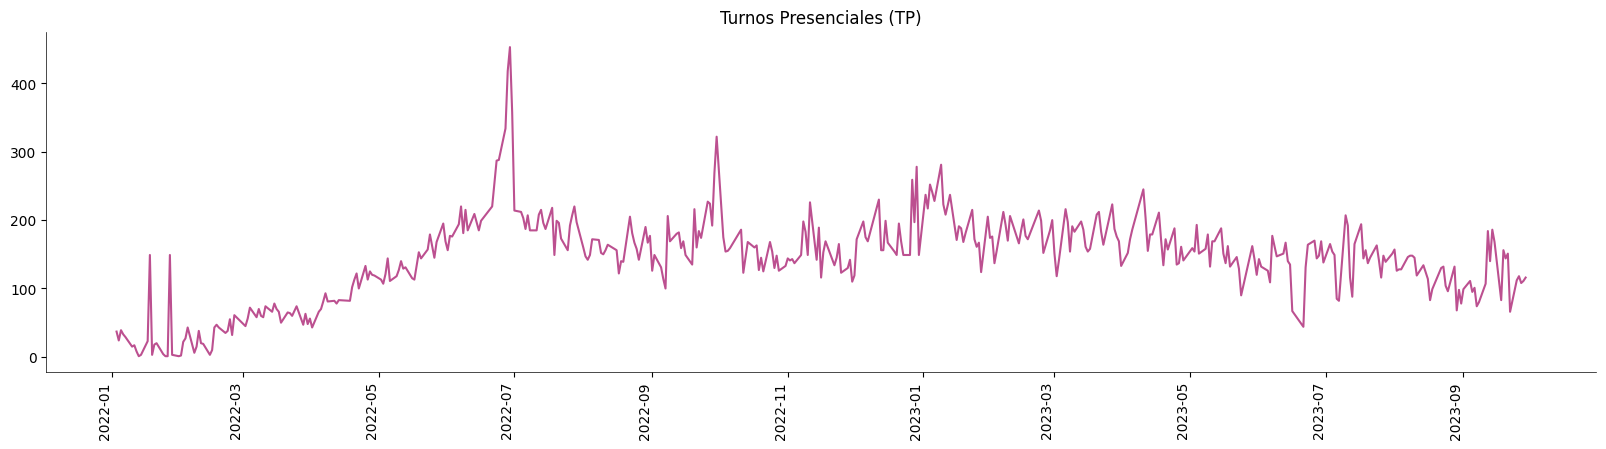

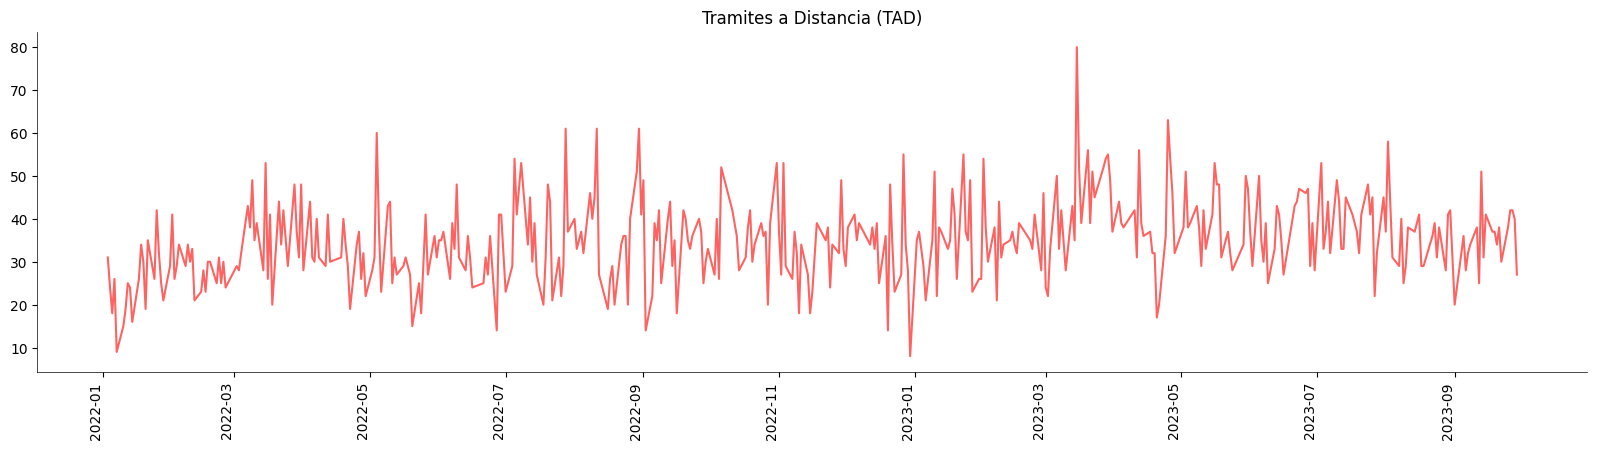

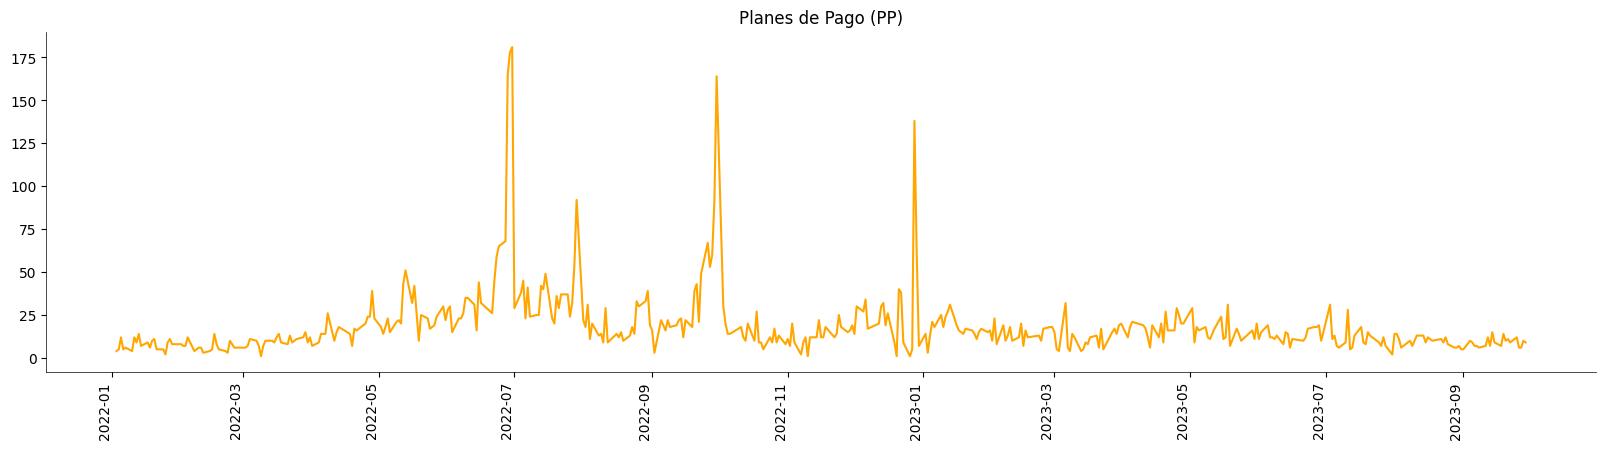

In [96]:
data['CC'].plot(figsize=(20, 5), title="Llamadas Call Center (CC)", color='#003f5c')
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

data["WAPP"][49:].plot(figsize=(20,5), title = "Mensajes Whatsapp (WAPP)", color='#58508d')
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

data.TP.plot(figsize=(20,5), title = "Turnos Presenciales (TP)", color='#bc5090')
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

data.TAD.plot(figsize=(20,5), title = "Tramites a Distancia (TAD)", color='#ff6361')
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

data.PP.plot(figsize=(20,5), title = "Planes de Pago (PP)", color='#ffa600')
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.show()

---
### **Descomposición multiplicativa**

Para visualizar y analizar las componentes de la serie de tiempo descompuesta, lo que puede ayudar a comprender la estructura de los datos y los patrones estacionales y de tendencia que pueden estar presentes. 

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

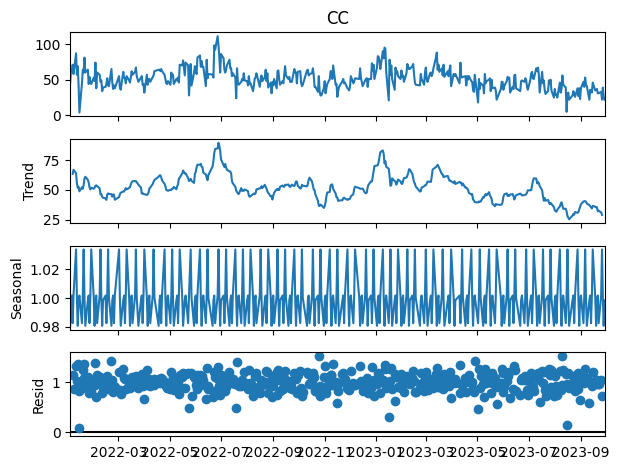

In [98]:

multiplicativeCC = seasonal_decompose(data.CC, model = "multiplicative", period=7)
multiplicativeCC.plot()
plt.show()

---
---
## **3. Graficar la FAS, FAC y FACP de las mismas en un solo gráfico y analizarlas. ¿Qué puede inferir de los gráficos?. Justificar con teoría.**

---
### **Representación gráfica de la Función de Autocorrelación**

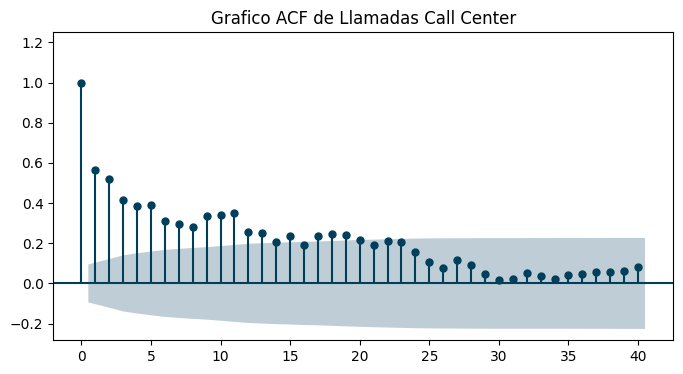

In [99]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#003f5c"
sm.graphics.tsa.plot_acf(data.CC, lags=40, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Llamadas Call Center", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()



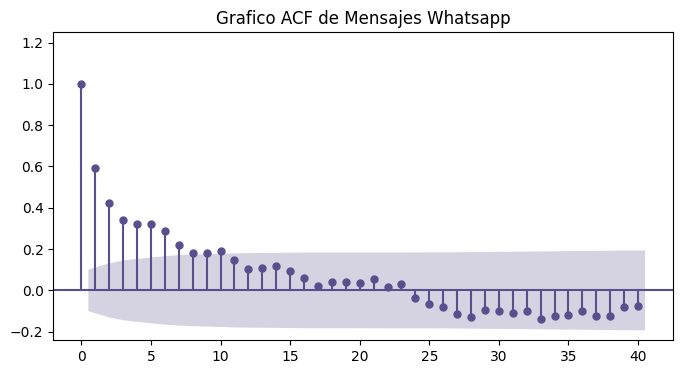

In [100]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#58508d"
sm.graphics.tsa.plot_acf(data["WAPP"][49:], lags=40, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Mensajes Whatsapp", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

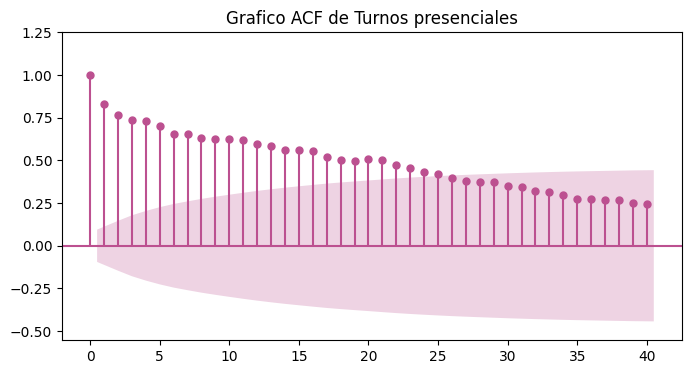

In [101]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#bc5090"
sm.graphics.tsa.plot_acf(data.TP, lags=40, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Turnos presenciales", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

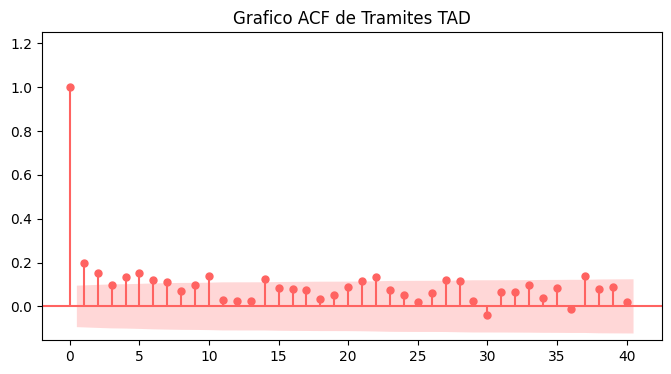

In [102]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ff6361"
sm.graphics.tsa.plot_acf(data.TAD, lags=40, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Tramites TAD", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

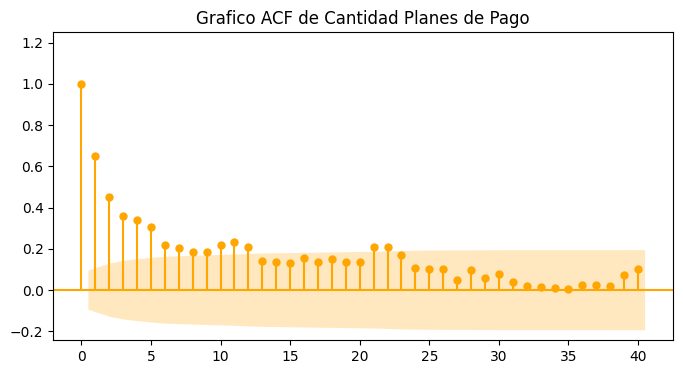

In [103]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ffa600"
sm.graphics.tsa.plot_acf(data.PP, lags=40, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico ACF de Cantidad Planes de Pago", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

---
### **Representación gráfica de la Función de Autocorrelación Parcial**

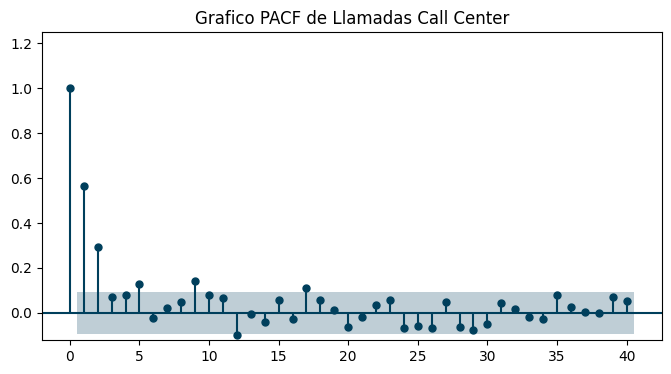

In [104]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#003f5c"
sm.graphics.tsa.plot_pacf(data.CC, lags=40, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Llamadas Call Center", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

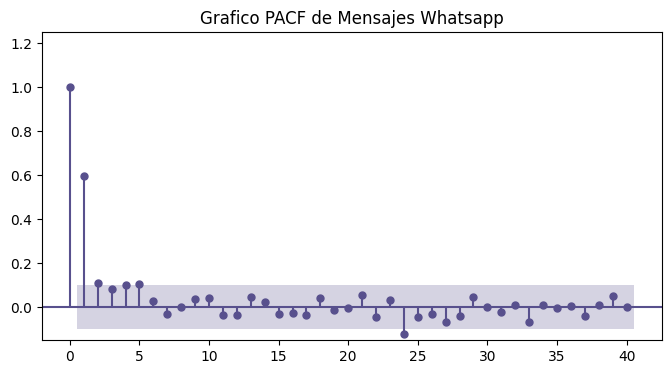

In [105]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#58508d"
sm.graphics.tsa.plot_pacf(data["WAPP"][49:], lags=40, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Mensajes Whatsapp", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

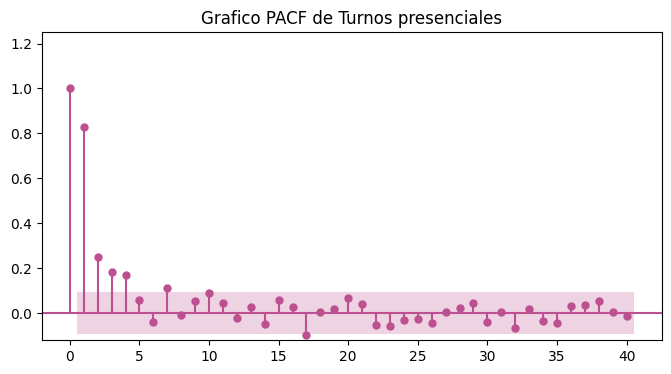

In [106]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#bc5090"
sm.graphics.tsa.plot_pacf(data.TP, lags=40, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Turnos presenciales", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

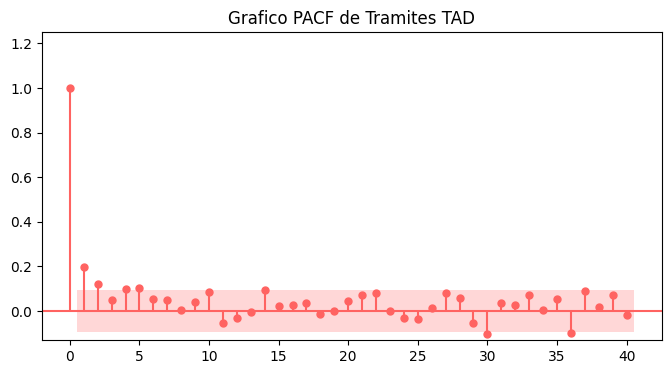

In [107]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ff6361"
sm.graphics.tsa.plot_pacf(data.TAD, lags=40, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Tramites TAD", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

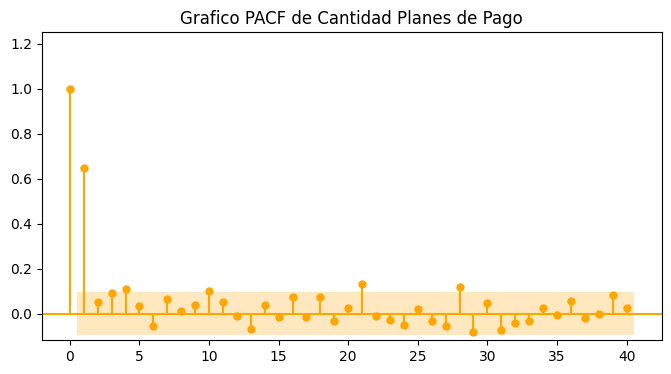

In [108]:
curr_fig, curr_ax = plt.subplots(figsize=(8, 4))

my_color="#ffa600"
sm.graphics.tsa.plot_pacf(data.PP, lags=40, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color}, auto_ylims=True)
plt.title("Grafico PACF de Cantidad Planes de Pago", size= 12)
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

---
---
## **4. Realizar distintas pruebas de raíces unitarias para determinar si las series elegidas son o no estacionarias**

--- 
### **TEST de Dickey Fuller**

In [109]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(data.CC, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-2.1013687061420208,
 0.24396459417791777,
 16,
 412,
 {'1%': -3.4463221132914486,
  '5%': -2.8685808072418824,
  '10%': -2.570520529031954},
 3135.777256208196)

Basándonos en el valor p de 0.2439645941779175 y los valores críticos, no hay suficiente evidencia para rechazar la hipótesis nula de no estacionariedad en tu serie de tiempo. Esto sugiere que la serie de tiempo podría no ser estacionaria en este nivel de significancia. 

In [110]:
tsa.adfuller(data["WAPP"][49:], maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-4.740535928304828,
 7.057244224841168e-05,
 4,
 375,
 {'1%': -3.447909006729481,
  '5%': -2.8692783343881483,
  '10%': -2.5708923751111112},
 2788.515168093619)

 Los resultados sugieren que la serie de tiempo *MENSAJES WHATSAPP* es estacionaria, ya que el p-valor es muy pequeño y el estadístico ADF es lo suficientemente extremo como para rechazar la hipótesis nula de no estacionariedad en todos los niveles de significancia.

In [111]:
tsa.adfuller(data.TP, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-2.720071010378734,
 0.0706290378826479,
 9,
 419,
 {'1%': -3.4460536145702383,
  '5%': -2.868462751982839,
  '10%': -2.570457599182051},
 3992.4271333684865)

 Los resultados sugieren que la serie de tiempo *TURNOS PRESENCIALES* no es estacionaria, ya que el p-valor es mayor que 0.05 no se puede rechazar la hipótesis nula de no estacionariedad 

In [112]:
tsa.adfuller(data.TAD, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-11.60162839285131,
 2.640276811120739e-21,
 1,
 427,
 {'1%': -3.445757604526768,
  '5%': -2.8683325885102855,
  '10%': -2.5703882165206853},
 2996.7825856750023)

 Los resultados sugieren que la serie de tiempo *TRAMITES A DISTANCIA* es estacionaria, ya que el p-valor es muy pequeño y el estadístico ADF es lo suficientemente extremo como para rechazar la hipótesis nula de no estacionariedad en todos los niveles de significancia.

In [113]:
tsa.adfuller(data.PP, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-5.8747718128446165,
 3.178469770919306e-07,
 3,
 425,
 {'1%': -3.445830555854264,
  '5%': -2.8683646683004276,
  '10%': -2.570405316262976},
 3418.691097446147)

 Los resultados sugieren que la serie de tiempo *PLANES DE PAGO* es estacionaria, ya que el p-valor es muy pequeño y el estadístico ADF es lo suficientemente extremo como para rechazar la hipótesis nula de no estacionariedad en todos los niveles de significancia.

**RESUMEN TEST DICKEY FULLER:**

CALL CENTER (CC) y TURNOS PRESENCIALES (TP) son series no estacionarias.

PLANES DE PAGO (PP), TRAMITES A DISTANCIA (TAD), y WHATSAPP (WAPP) son series estacionarias

----
### **TEST KPSS** para evaluar estacionariedad

In [114]:
from statsmodels.tsa.stattools import kpss

In [115]:
def kpss_test(series, **kw):

    params = {'c':'Los datos son estacionarios alrededor de una constante.',
              'ct': 'Los datos son estacionarios alrededor de una tendencia.'
             }

    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')

        statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
        # Format Output
        print(f'KPSS Estadistico: {statistic}')
        print(f'p-valor: {p_value}')
        print(f'numero de lags: {n_lags}')
        print('Valor critico:')
        for key, value in critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if p_value < 0.05 else ""}estacionaria')
        print(f"KPSS Numero estimado de diferencias a aplicar: {ndiffs(series, test='kpss')}")

        print("*".center(60, '*'))
        print("")

In [116]:
kpss_test(data.CC)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.9192245711164564
p-valor: 0.01
numero de lags: 10
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.25262410660288226
p-valor: 0.01
numero de lags: 10
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



C:\Users\ferna\AppData\Local\Temp\ipykernel_17924\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
C:\Users\ferna\AppData\Local\Temp\ipykernel_17924\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)


Segun el test KPSS, la serie CALL CENTER no es estacionaria, y hay que hacer una diferenciación

In [117]:
kpss_test(data["WAPP"][49:]) #data1.WAPP es la variable

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.2857467127776876
p-valor: 0.1
numero de lags: 10
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 0
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.06194459823169663
p-valor: 0.1
numero de lags: 9
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 0
************************************************************



C:\Users\ferna\AppData\Local\Temp\ipykernel_17924\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
C:\Users\ferna\AppData\Local\Temp\ipykernel_17924\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)


Se valida con el test KPSS que la serie WHATSAPP es estacionaria, y no hay que diferenciar

In [118]:
kpss_test(data.TP)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.8789591389582808
p-valor: 0.01
numero de lags: 11
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.5760280204531608
p-valor: 0.01
numero de lags: 11
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



C:\Users\ferna\AppData\Local\Temp\ipykernel_17924\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
C:\Users\ferna\AppData\Local\Temp\ipykernel_17924\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)


Segun el test KPSS, la serie TURNOS PRESENCIALES no es estacionaria, y hay que hacer una diferenciación

In [119]:
kpss_test(data.TAD)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 1.5813196149381574
p-valor: 0.01
numero de lags: 7
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.14338653675178933
p-valor: 0.05483974675594566
numero de lags: 5
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



C:\Users\ferna\AppData\Local\Temp\ipykernel_17924\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)


Segun el TEST KPSS la serie TAD no es estacionaria, y hay que aplicar una diferenciación.

En resumen, los resultados de las pruebas KPSS indican que:

1. Bajo el supuesto de que los datos son estacionarios alrededor de una constante, la serie de tiempo es no estacionaria. Se requiere al menos una diferencia para lograr la estacionariedad.

2. Bajo el supuesto de que los datos son estacionarios alrededor de una tendencia, la serie de tiempo se considera estacionaria sin necesidad de diferenciación adicional.


In [120]:
kpss_test(data.PP)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.5047946564144291
p-valor: 0.0405867890958493
numero de lags: 10
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.28535914113265437
p-valor: 0.01
numero de lags: 10
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



C:\Users\ferna\AppData\Local\Temp\ipykernel_17924\2551453940.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)


Segun el TEST KPSS la serie PLAN DE PAGOS no es estacionaria, y hay que aplicar una diferenciación

**RESUMEN TEST KPSS:**

CALL CENTER (CC), TURNOS PRESENCIALES (TP), PLANES DE PAGO (PP) y TRAMITES A DISTANCIA (TAD) son series no estacionarias.

WHATSAPP (WAPP) son series estacionarias

---
### **TEST PHILLIP PERRON** para evaluar estacionariedad

In [121]:
from arch.unitroot import PhillipsPerron

In [122]:
def Phillips_Perron(series, **k):

    params = {'n':'No incluye término independiente ni lineal',
              'c':'Incluya término independiente pero no incluye término lineal',
              'ct':'Incluya ambos términos'
              }
    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')
        pp = PhillipsPerron(series,trend=param, **k)
        print(f'PP Estadistico: {pp.stat}')
        print(f'p-valor: {pp.pvalue}')
        print(f'numero de lags: {pp.lags}')
        print('Valor Critico:')
        for key, value in pp.critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if pp.pvalue > 0.05 else ""}estacionaria')
        print(f"PP Numero de diferenciacion estimada: {ndiffs(series, test='pp')}")

        print("*".center(60, '*'))
        print("")

In [123]:
Phillips_Perron(data.CC)

Tipo de regresión: n - No incluye término independiente ni lineal
PP Estadistico: -1.7807769926143742
p-valor: 0.07121584323851378
numero de lags: 18
Valor Critico:
   1% : -2.5709836315398724
   5% : -1.94164554136314
   10% : -1.6162139314477124
Resultado: La serie es no estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -14.206309015850245
p-valor: 1.752399696618312e-26
numero de lags: 18
Valor Critico:
   1% : -3.445721386098794
   5% : -2.868316661451884
   10% : -2.5703797268320376
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -14.900334535371496
p-valor: 2.461609953777446e-22
numero de lags: 18
Valor Critico:
   1% : -3.9800790021304353
   5% : -3.420797850107098
  

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = resols.bse[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho = resols.params[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame be

Segun el test Phillips Terron, la serie CALL CENTER no es estacionaria, pero no hay que hacer una diferenciación

In [124]:
Phillips_Perron(data["WAPP"][49:])

Tipo de regresión: n - No incluye término independiente ni lineal
PP Estadistico: -3.2826823515152976
p-valor: 0.0010394347068614844
numero de lags: 17
Valor Critico:
   1% : -2.5716644588940483
   5% : -1.941731560051895
   10% : -1.6161376368621574
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -11.45863242953552
p-valor: 5.625490417348521e-21
numero de lags: 17
Valor Critico:
   1% : -3.4477224095888497
   5% : -2.869196333125208
   10% : -2.5708486586002604
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -11.562162253188461
p-valor: 2.09519289511337e-18
numero de lags: 17
Valor Critico:
   1% : -3.9828571817306773
   5% : -3.42213790916463
   1

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = resols.bse[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho = resols.params[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame be

Se valida con el test Phillip Perron que la serie WHATSAPP es estacionaria, y no hay que diferenciar

In [125]:
Phillips_Perron(data.TP)

Tipo de regresión: n - No incluye término independiente ni lineal
PP Estadistico: -1.4266604705615569
p-valor: 0.14335216719946786
numero de lags: 18
Valor Critico:
   1% : -2.5709836315398724
   5% : -1.94164554136314
   10% : -1.6162139314477124
Resultado: La serie es no estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -7.108234012236368
p-valor: 4.001465493978547e-10
numero de lags: 18
Valor Critico:
   1% : -3.445721386098794
   5% : -2.868316661451884
   10% : -2.5703797268320376
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -7.611142835201936
p-valor: 5.652835217386737e-10
numero de lags: 18
Valor Critico:
   1% : -3.9800790021304353
   5% : -3.420797850107098
   1

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = resols.bse[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho = resols.params[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame be

Segun el test Phillip Terron, la serie TURNOS PRESENCIALES no es estacionaria, y hay que hacer una diferenciación

In [126]:
Phillips_Perron(data.TAD)

Tipo de regresión: n - No incluye término independiente ni lineal
PP Estadistico: -2.7453123143892393
p-valor: 0.005887212826933744
numero de lags: 18
Valor Critico:
   1% : -2.5709836315398724
   5% : -1.94164554136314
   10% : -1.6162139314477124
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -19.27348530097995
p-valor: 0.0
numero de lags: 18
Valor Critico:
   1% : -3.445721386098794
   5% : -2.868316661451884
   10% : -2.5703797268320376
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -18.961394834354692
p-valor: 0.0
numero de lags: 18
Valor Critico:
   1% : -3.9800790021304353
   5% : -3.420797850107098
   10% : -3.133112833488294
Resultado: La

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = resols.bse[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho = resols.params[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame be

Segun el TEST Phillip Terron la serie TAD  es estacionaria, y no hay que aplicar una diferenciación.


In [127]:
Phillips_Perron(data.PP)

Tipo de regresión: n - No incluye término independiente ni lineal
PP Estadistico: -7.677813161568031
p-valor: 1.7804465990549179e-12
numero de lags: 18
Valor Critico:
   1% : -2.5709836315398724
   5% : -1.94164554136314
   10% : -1.6162139314477124
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -10.908804348710792
p-valor: 1.110427931315897e-19
numero de lags: 18
Valor Critico:
   1% : -3.445721386098794
   5% : -2.868316661451884
   10% : -2.5703797268320376
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -10.930098333648829
p-valor: 3.0262925504771196e-17
numero de lags: 18
Valor Critico:
   1% : -3.9800790021304353
   5% : -3.420797850107098
  

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = resols.bse[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho = resols.params[0]
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\unitroot\unitroot.py:1134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame be

Segun el TEST Phillip Perron la serie PLAN DE PAGOS  es estacionaria, y no hay que aplicar una diferenciación

**RESUMEN TEST PHILLIP PERRON:**

CALL CENTER (CC), TURNOS PRESENCIALES (TP) son series no estacionarias.

WHATSAPP (WAPP), PLANES DE PAGO (PP) y TRAMITES A DISTANCIA (TAD) son series estacionarias

---
##### **CUADRO RESUMEN TESTS DE ESTACIONARIEDAD**



In [128]:
resultado_tests = [
    ["Dickey Fuller", "no", "si", "no", "si", "si"],
    ["KPSS", "no", "si", "no", "si", "no"],
    ["Phillip Perron", "no", "si", "no", "si", "si"]
]

headers = ["Test", "cc", "wapp", "tp", "tad", "pp"]
df = pd.DataFrame(resultado_tests, columns=headers)
print(df)


             Test  cc wapp  tp tad  pp
0   Dickey Fuller  no   si  no  si  si
1            KPSS  no   si  no  si  no
2  Phillip Perron  no   si  no  si  si


----
### **¿Cuántas diferenciaciones hay que hacer?**

In [129]:
def estacionario(y):
  # Estimado de número de diferencias con ADF test:Dickey-Fuller
  n_adf = ndiffs(y, test='adf')  # -> 0

  # KPSS test (auto_arima default): Kwiatkowski-Phillips-Schmidt-Shin
  n_kpss = ndiffs(y, test='kpss')  # -> 0

  # PP test: Phillips-Perron
  n_pp = ndiffs(y, test='pp')  # -> 0

  print('Estimado de número de diferencias con ADF test')
  print(n_adf)

  print('Estimado de número de diferencias con KPSS test')
  print(n_kpss)

  print('Estimado de número de diferencias con PP test')
  print(n_pp)

  print('Se debe realizar diferenciación (should_diff) ADF Test')
  adftest = ADFTest(alpha=0.05)
  print(adftest.should_diff(y))

In [130]:
estacionario(data.CC) #variable

Estimado de número de diferencias con ADF test
0
Estimado de número de diferencias con KPSS test
1
Estimado de número de diferencias con PP test
0
Se debe realizar diferenciación (should_diff) ADF Test
(0.01, False)


In [131]:
estacionario(data["WAPP"][49:]) #variable

Estimado de número de diferencias con ADF test
0
Estimado de número de diferencias con KPSS test
0
Estimado de número de diferencias con PP test
0
Se debe realizar diferenciación (should_diff) ADF Test
(0.01, False)


In [132]:
estacionario(data.TP) #variable

Estimado de número de diferencias con ADF test
1
Estimado de número de diferencias con KPSS test
1
Estimado de número de diferencias con PP test
0
Se debe realizar diferenciación (should_diff) ADF Test
(0.2555557576872258, True)


In [133]:
estacionario(data.TAD) #variable

Estimado de número de diferencias con ADF test
0
Estimado de número de diferencias con KPSS test
1
Estimado de número de diferencias con PP test
0
Se debe realizar diferenciación (should_diff) ADF Test
(0.01, False)


In [134]:
estacionario(data.PP) #variable

Estimado de número de diferencias con ADF test
0
Estimado de número de diferencias con KPSS test
1
Estimado de número de diferencias con PP test
0
Se debe realizar diferenciación (should_diff) ADF Test
(0.01, False)


Validamos que en las series que eran estacionarias, segun el test de Dickey Fuller, no hay que hacer diferenciaciones.
En la serie TURNOS PRESENCIALES que no era estacionaria, hay que hacer una diferenciación.
En la serie CALL CENTER que no era estacionaria, no hay que hacer ninguna diferenciación. 

---
### **HACER DIFERENCIACION**

In [135]:
# DIFERENCIACION DE LA VARIABLE CALL CENTER (CC)

# Opcion 1
data_diff_CC = data.CC.copy()
data_diff_CC = data_diff_CC.diff(periods = 1)
data_diff_CC.drop(['2022-01-03'], inplace=True)

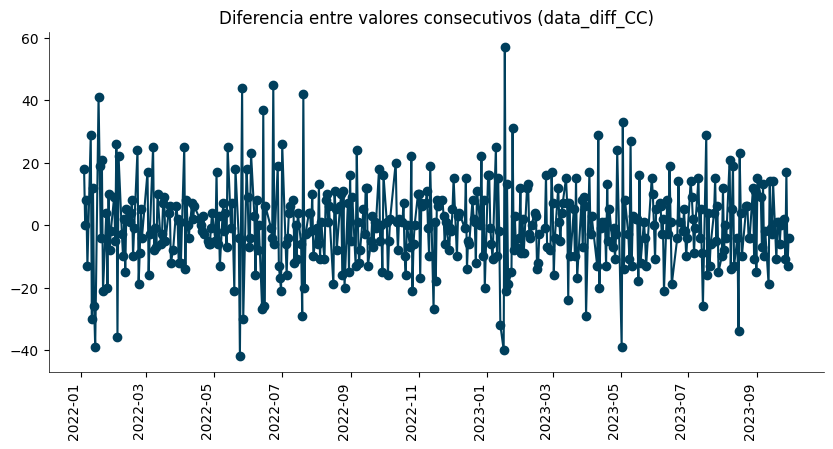

In [136]:
# Traza la Serie data1_diff_CC
data_diff_CC.plot(figsize=(10, 5), marker='o', linestyle='-', color='#003f5c')

# Etiquetas y título del gráfico
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Diferencia entre valores consecutivos (data_diff_CC)')

# Muestra el gráfico
plt.show()


In [137]:
# DIFERENCIACION DE LA VARIABLE TURNOS PRESENCIALES (TP)

# Opcion 1
data_diff_TP = data.TP.copy()
data_diff_TP = data_diff_TP.diff(periods = 1)
data_diff_TP.drop(['2022-01-03'], inplace=True)

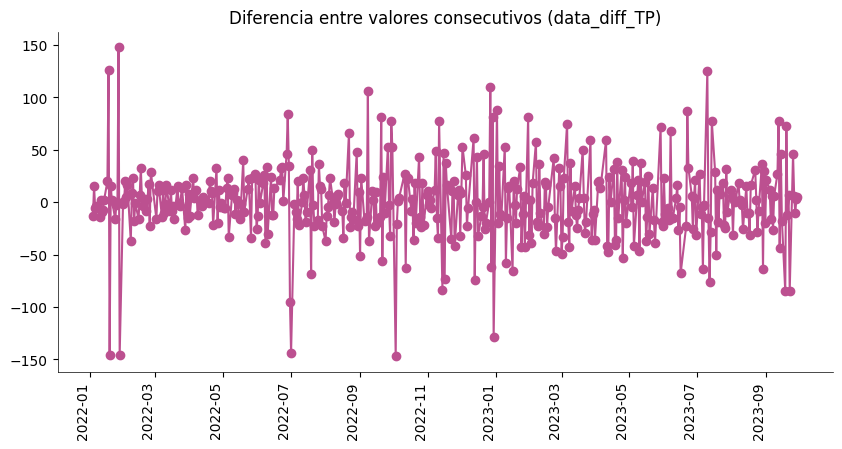

In [138]:
# Traza la Serie data1_diff_CC
data_diff_TP.plot(figsize=(10, 5), marker='o', linestyle='-', color='#bc5090')

# Etiquetas y título del gráfico
plt.xlabel('')  # Establecer el título del eje x como una cadena vacía
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Diferencia entre valores consecutivos (data_diff_TP)')

# Muestra el gráfico
plt.show()

---
---
## **5. Efectuar una estimación de la serie temporal con distintos órdenes de parámetros de modelos SARIMA y encontrar aquel que se ajuste mejor a los datos (pueden emplear Criterios de Información/Selección y analizar significatividad individual y global de los parámetros del modelo).**

**CALL CENTER (CC)**

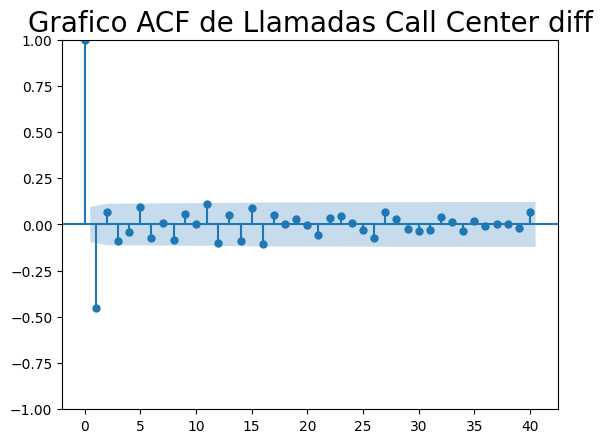

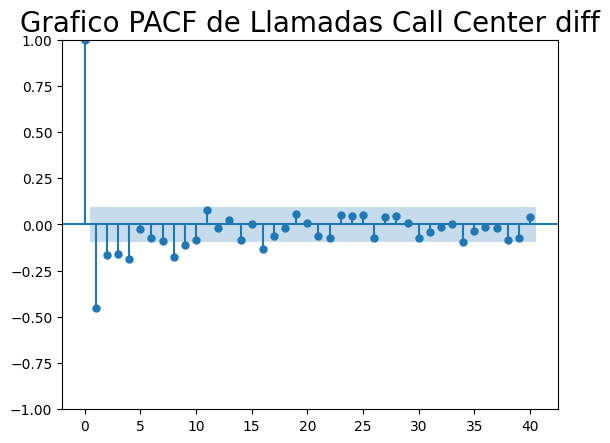

In [139]:
plot_acf(data_diff_CC,lags=40)
plt.title("Grafico ACF de Llamadas Call Center diff", size= 20)
plt.show()

plot_pacf(data_diff_CC,lags=40)
plt.title("Grafico PACF de Llamadas Call Center diff", size= 20)
plt.show()

In [140]:
auto_CC = auto_arima(data_diff_CC, 
                     seasonal=True, 
                     m=7, 
                     trace=True,
                     suppress_warnings=True,
                     #return_valid_fits=True,
                     stepwise=True
                     )

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=3314.020, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3460.806, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=3365.015, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=3322.542, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=3458.813, Time=0.01 sec


 ARIMA(2,0,2)(0,0,1)[7] intercept   : AIC=3315.358, Time=0.65 sec
 ARIMA(2,0,2)(1,0,0)[7] intercept   : AIC=3315.577, Time=0.56 sec
 ARIMA(2,0,2)(2,0,1)[7] intercept   : AIC=3315.876, Time=1.74 sec
 ARIMA(2,0,2)(1,0,2)[7] intercept   : AIC=3315.865, Time=1.88 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : AIC=3314.623, Time=0.32 sec
 ARIMA(2,0,2)(0,0,2)[7] intercept   : AIC=3314.708, Time=0.99 sec
 ARIMA(2,0,2)(2,0,0)[7] intercept   : AIC=3315.142, Time=1.04 sec
 ARIMA(2,0,2)(2,0,2)[7] intercept   : AIC=3317.863, Time=2.58 sec
 ARIMA(1,0,2)(1,0,1)[7] intercept   : AIC=3315.225, Time=1.49 sec
 ARIMA(2,0,1)(1,0,1)[7] intercept   : AIC=3312.240, Time=1.11 sec
 ARIMA(2,0,1)(0,0,1)[7] intercept   : AIC=3313.615, Time=0.85 sec
 ARIMA(2,0,1)(1,0,0)[7] intercept   : AIC=3313.819, Time=0.71 sec
 ARIMA(2,0,1)(2,0,1)[7] intercept   : AIC=3314.060, Time=1.72 sec
 ARIMA(2,0,1)(1,0,2)[7] intercept   : AIC=3314.050, Time=1.35 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=3312.786, Time=0.28 sec
 ARIMA(2,0

In [141]:
model_CC = sm.tsa.arima.ARIMA(data_diff_CC, order=(3,0,3), seasonal_order=(1,0,1,7))
result_CC = model_CC.fit()

result_CC.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiza

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                CC   No. Observations:                  428
Model:             ARIMA(3, 0, 3)x(1, 0, [1], 7)   Log Likelihood               -1642.863
Date:                           Wed, 08 Nov 2023   AIC                           3305.726
Time:                                   19:38:49   BIC                           3346.317
Sample:                                        0   HQIC                          3321.757
                                           - 428                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0574      0.092     -0.624      0.533      -0.238       0.123
ar.L1         -1.1871      0.203     -5.842      0.000      -1.585      -0.789
ar.L2          0.0004      0.200      0.002      0.998      -0.392       0.393
ar.L3          0.2746      0.058      4.740      0.000       0.161       0.388
ma.L1          0.5519      0.213      2.595      0.009       0.135       0.969
ma.L2         -0.7747      0.066    -11.717      0.000      -0.904      -0.645
ma.L3         -0.3834      0.160     -2.399      0.016      -0.697      -0.070
ar.S.L7        0.5296      0.244      2.167      0.030       0.051       1.009
ma.S.L7       -0.6553      0.220     -2.984      0.003      -1.086      -0.225
sigma2       125.9308      7.552     16.676      0.000     111.130     140.732
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                47.72
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**WHATSAPP (WAPP)**

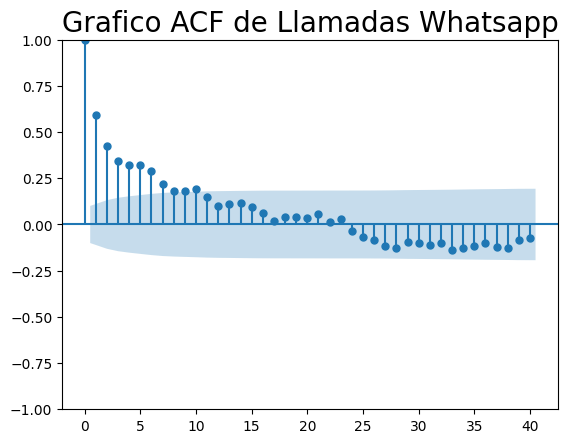

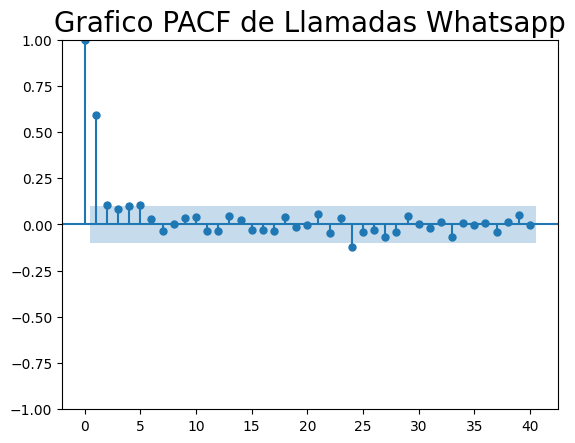

In [142]:
plot_acf(data["WAPP"][49:],lags=40)
plt.title("Grafico ACF de Llamadas Whatsapp", size= 20)
plt.show()
plot_pacf(data["WAPP"][49:],lags=40)
plt.title("Grafico PACF de Llamadas Whatsapp", size= 20)
plt.show()

In [143]:
auto_WAPP = auto_arima(data["WAPP"][49:], 
                    trace=True,
                    suppress_warnings=True,
                    #return_valid_fits=True,
                    stepwise=True
                    )

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2940.065, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3112.237, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2947.500, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3000.174, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3757.350, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2938.703, Time=0.32 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2970.784, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2942.708, Time=0.20 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2939.780, Time=0.44 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2960.786, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2938.339, Time=0.40 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2945.000, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2939.965, Time=0.58 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2944.062, Time=0.23 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept

In [144]:
model_WAPP = sm.tsa.arima.ARIMA(data["WAPP"][49:], order=(2,0,1))
result_WAPP = model_WAPP.fit()

result_WAPP.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WAPP   No. Observations:                  380
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1464.169
Date:                Wed, 08 Nov 2023   AIC                           2938.339
Time:                        19:38:54   BIC                           2958.040
Sample:                             0   HQIC                          2946.156
                                - 380                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.2775      2.762     10.960      0.000      24.863      35.692
ar.L1          1.2388      0.157      7.884      0.000       0.931       1.547
ar.L2         -0.3019      0.107     -2.813      0.005      -0.512      -0.092
ma.L1         -0.7427      0.150     -4.967      0.000      -1.036      -0.450
sigma2       129.9111      5.662     22.943      0.000     118.813     141.009
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               564.68
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             1.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**TURNOS PRESENCIALES (TP)**

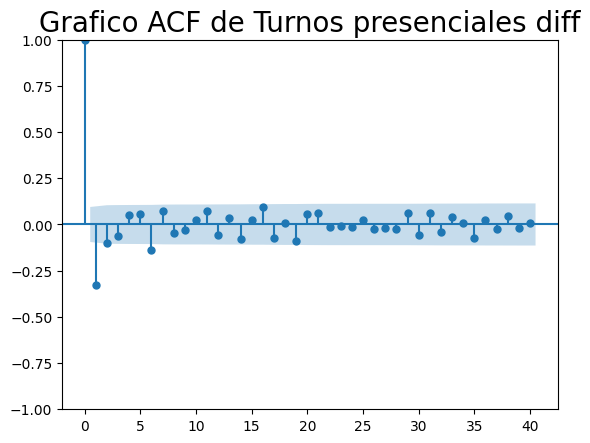

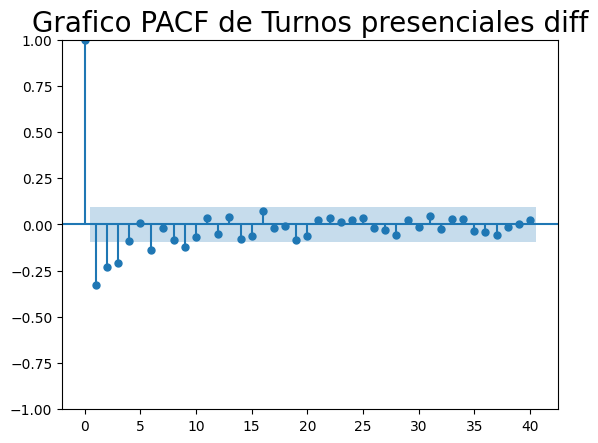

In [145]:
plot_acf(data_diff_TP,lags=40)
plt.title("Grafico ACF de Turnos presenciales diff", size= 20)
plt.show()
plot_pacf(data_diff_TP,lags=40)
plt.title("Grafico PACF de Turnos presenciales diff", size= 20)
plt.show()

In [146]:
auto_TP = auto_arima(data_diff_TP, 
                    trace=True,
                    suppress_warnings=True,
                    #return_valid_fits=True
                    )

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4294.133, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4248.420, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4210.094, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4292.144, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4197.206, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4199.109, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4199.080, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=4199.272, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4227.216, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4195.429, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4208.174, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4246.443, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4197.346, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : 

In [147]:
model_TP = sm.tsa.arima.ARIMA(data_diff_TP, order=(1,0,1))
result_TP = model_TP.fit()

result_TP.summary()


c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     TP   No. Observations:                  428
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2094.603
Date:                Wed, 08 Nov 2023   AIC                           4197.206
Time:                        19:38:57   BIC                           4213.442
Sample:                             0   HQIC                          4203.618
                                - 428                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2082      0.486      0.428      0.668      -0.745       1.161
ar.L1          0.3230      0.047      6.827      0.000       0.230       0.416
ma.L1         -0.8114      0.027    -29.829      0.000      -0.865      -0.758
sigma2      1041.8052     48.690     21.397      0.000     946.374    1137.237
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               162.14
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.59
Prob(H) (two-sided):                  0.15   Kurtosis:                         5.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**TRAMITES A DISTANCIA (TAD)**

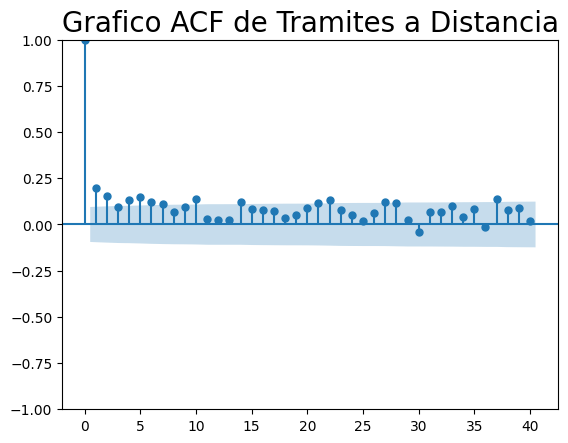

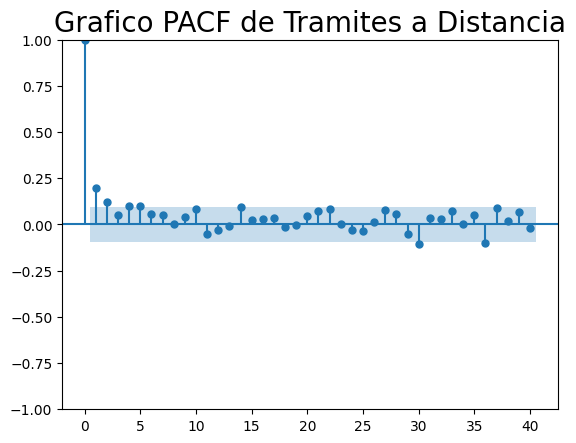

In [148]:
plot_acf(data["TAD"],lags=40)
plt.title("Grafico ACF de Tramites a Distancia", size= 20)
plt.show()
plot_pacf(data["TAD"],lags=40)
plt.title("Grafico PACF de Tramites a Distancia", size= 20)
plt.show()

In [149]:
auto_TAD = auto_arima(data["TAD"], stationary =True, seasonal= False, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3162.418, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3147.654, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3151.075, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4302.516, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3143.451, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3144.375, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3135.003, Time=0.54 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3131.873, Time=0.47 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3134.632, Time=0.66 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3146.127, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3133.546, Time=0.11 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 3.259 seconds


In [150]:
model_TAD = sm.tsa.arima.ARIMA(data["TAD"], order=(1,0,1))
result_TAD = model_TAD.fit()

result_TAD.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    TAD   No. Observations:                  429
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1560.635
Date:                Wed, 08 Nov 2023   AIC                           3129.270
Time:                        19:39:01   BIC                           3145.516
Sample:                             0   HQIC                          3135.686
                                - 429                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.4063      1.797     19.150      0.000      30.885      37.928
ar.L1          0.9769      0.016     61.994      0.000       0.946       1.008
ma.L1         -0.9027      0.030    -29.722      0.000      -0.962      -0.843
sigma2        84.4899      4.629     18.253      0.000      75.418      93.562
===================================================================================
Ljung-Box (L1) (Q):                   1.26   Jarque-Bera (JB):                46.20
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.48
Prob(H) (two-sided):                  0.67   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**PLAN DE PAGOS (PP)**

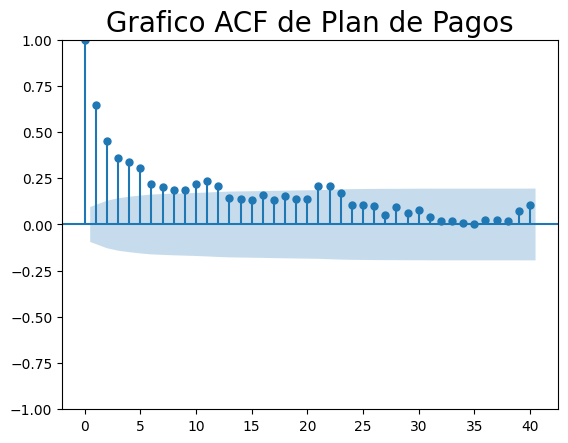

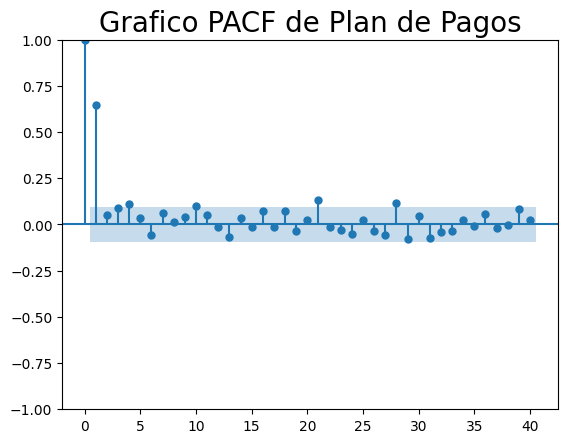

In [151]:
plot_acf(data["PP"],lags=40)
plt.title("Grafico ACF de Plan de Pagos", size= 20)
plt.show()
plot_pacf(data["PP"],lags=40)
plt.title("Grafico PACF de Plan de Pagos", size= 20)
plt.show()

In [152]:
auto_PP = auto_arima(data["PP"], stationary=True, seasonal=False, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3561.192, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3798.627, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3566.044, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3638.026, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4060.607, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3562.212, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3559.523, Time=0.48 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3566.477, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3566.954, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3561.215, Time=0.64 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3565.485, Time=0.22 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3561.618, Time=0.19 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 3.800 seconds


In [153]:
model_PP = sm.tsa.arima.ARIMA(data["PP"], order=(2,0,1))
result_PP = model_PP.fit()

result_PP.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     PP   No. Observations:                  429
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1774.762
Date:                Wed, 08 Nov 2023   AIC                           3559.523
Time:                        19:39:06   BIC                           3579.831
Sample:                             0   HQIC                          3567.543
                                - 429                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7328      7.777      2.280      0.023       2.491      32.975
ar.L1          1.4828      0.069     21.367      0.000       1.347       1.619
ar.L2         -0.5001      0.056     -8.906      0.000      -0.610      -0.390
ma.L1         -0.9021      0.057    -15.847      0.000      -1.014      -0.791
sigma2       229.1579      5.196     44.105      0.000     218.975     239.341
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             14814.17
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             2.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Resumen de AUTOARIMA
Luego de efectuar el AUTOARIMA, los resultados para cada serie quedan:

In [154]:
auto_CC

ARIMA(order=(3, 0, 3), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True, with_intercept=False)

In [155]:
auto_WAPP

ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True)

In [156]:
auto_TP

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [157]:
auto_TAD

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True)

In [158]:
auto_PP

ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True)

---
## **6. Evaluar alguna métrica de performance teniendo en cuenta el entrenamiento del modelo entre Training Set y Testing Set.**

In [159]:
def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Fecha", ylabel="Interacciones"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [160]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

In [180]:
def evaluar_metricas(serie_test, serie_pred, metric_name):
    mse = mean_squared_error(serie_test, serie_pred)
    mae = mean_absolute_error(serie_test, serie_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(abs((serie_test - serie_pred) / serie_test))

    metrics = {
        'Model' : metric_name,
        'MSE': [mse],
        'MAE': [mae],
        'RMSE': [rmse],
        'MAPE': [mape]
    }

    metrics_df = pd.DataFrame(metrics)

    return metrics_df

### **CALL CENTER (CC)**

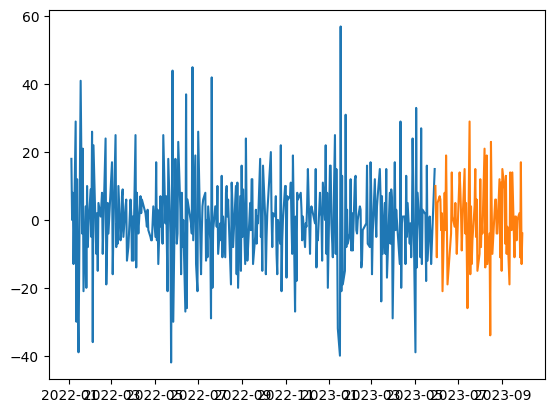

In [161]:
# Seleccionamos el primer 80% para train
train_CC = data_diff_CC.iloc[:round(len(data_diff_CC)*.80)]

# Seleccionamos el 20% restante para test
test_CC = data_diff_CC.iloc[round(len(data_diff_CC)*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
# print(train_CC, test_CC)

plt.plot(train_CC)
plt.plot(test_CC)

In [162]:
auto_CC

ARIMA(order=(3, 0, 3), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True, with_intercept=False)

In [163]:
model_CC = sm.tsa.arima.ARIMA(train_CC, order=(3,0,3), seasonal_order=(1,0,1,7))
model_CC = model_CC.fit()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


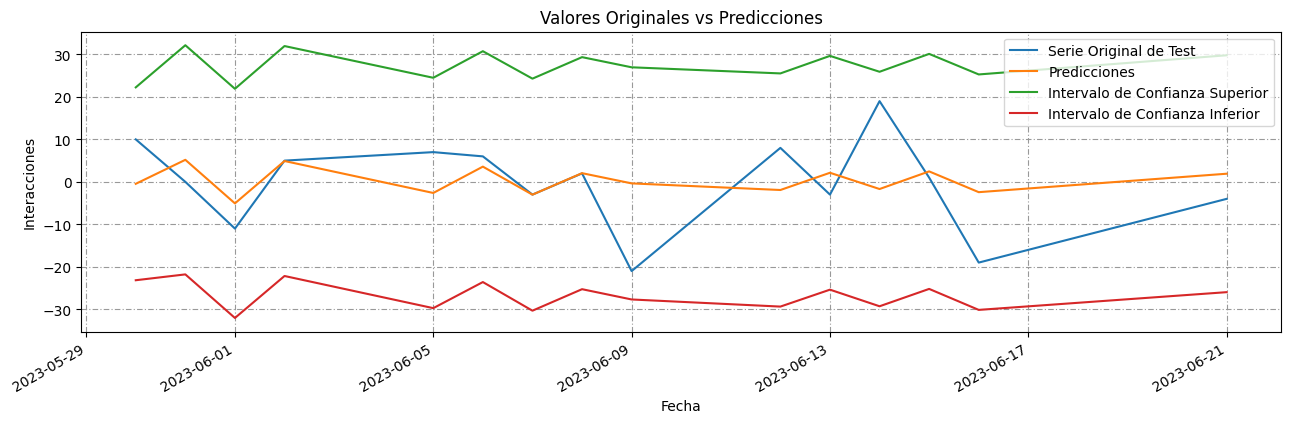

In [164]:
dias_estimar = 15

predicciones_CC = model_CC.get_forecast(dias_estimar)
CC_pred = predicciones_CC.predicted_mean
CC_int = predicciones_CC.conf_int()
CC_pred.index = test_CC[:dias_estimar].index
CC_int.index = test_CC[:dias_estimar].index
graficar_pred(test_CC[:dias_estimar], CC_pred, CC_int)

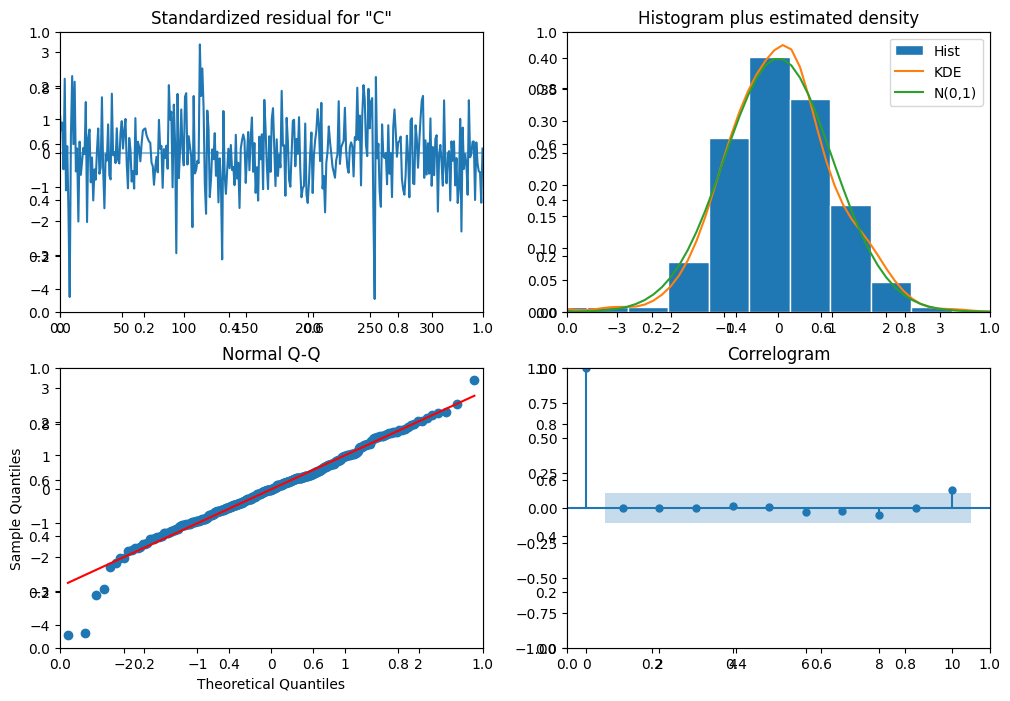

In [165]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
model_CC.plot_diagnostics(fig=fig)
plt.show()

In [183]:
metricas_CC_1 = evaluar_metricas(test_CC[:dias_estimar], CC_pred, "CC (3,0,3)(1,0,1)[7]")
metricas_CC_1

Model         MSE       MAE       RMSE  MAPE
0  CC (3,0,3)(1,0,1)[7]  104.022581  7.606993  10.199146   inf

In [167]:
#ARIMA(3,0,3)(0,0,1)[7]
model_CC_2 = sm.tsa.arima.ARIMA(train_CC, order=(3,0,3), seasonal_order=(0,0,1,7))
model_CC_2 = model_CC_2.fit()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


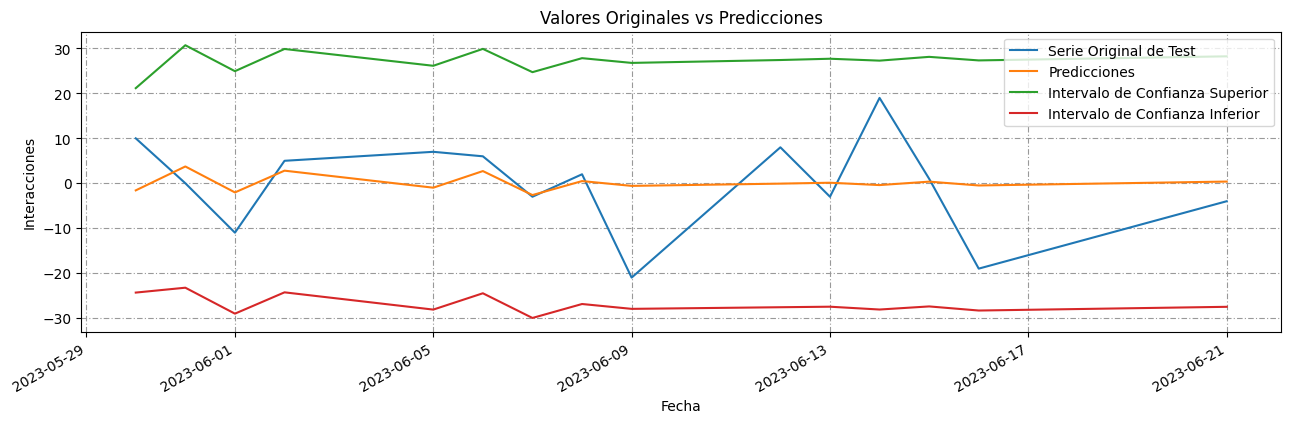

In [168]:
dias_estimar = 15

predicciones_CC_2 = model_CC_2.get_forecast(dias_estimar)
CC_pred_2 = predicciones_CC_2.predicted_mean
CC_int_2 = predicciones_CC_2.conf_int()
CC_pred_2.index = test_CC[:dias_estimar].index
CC_int_2.index = test_CC[:dias_estimar].index
graficar_pred(test_CC[:dias_estimar], CC_pred_2, CC_int_2)

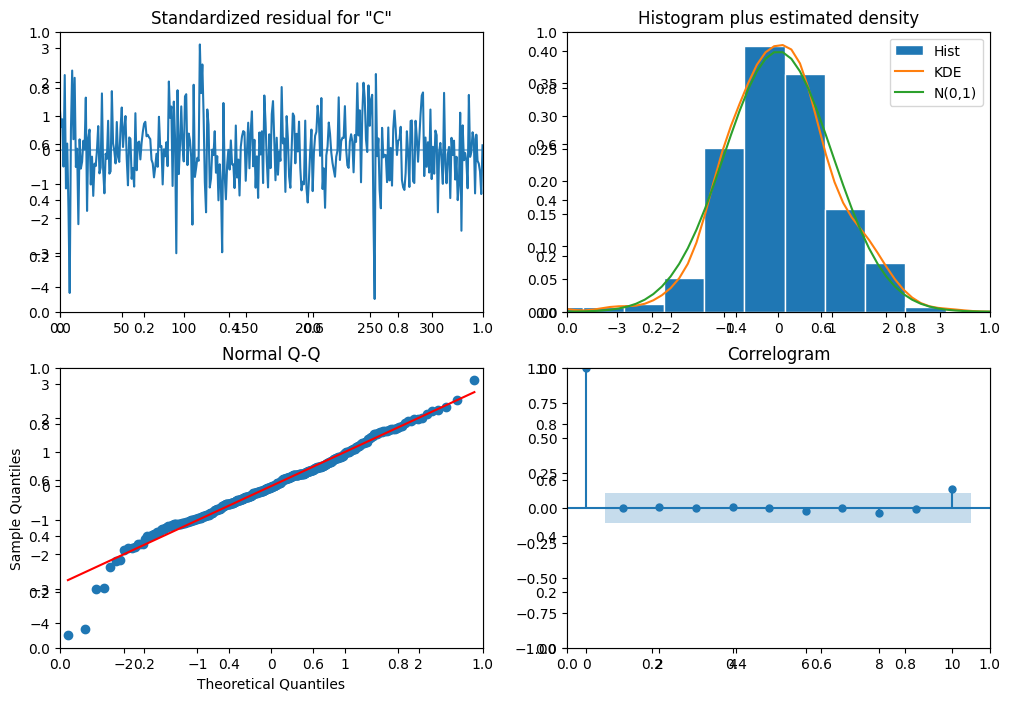

In [169]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
model_CC_2.plot_diagnostics(fig=fig)
plt.show()

In [184]:
metricas_CC_2 = evaluar_metricas(test_CC[:dias_estimar], CC_pred_2, "CC (3,0,3)(0,0,1)[7]")
metricas_CC_2

Model        MSE       MAE      RMSE  MAPE
0  CC (3,0,3)(0,0,1)[7]  102.72187  7.612438  10.13518   inf

In [185]:
pd.concat([metricas_CC_1, metricas_CC_2], ignore_index=True)

Model         MSE       MAE       RMSE  MAPE
0  CC (3,0,3)(1,0,1)[7]  104.022581  7.606993  10.199146   inf
1  CC (3,0,3)(0,0,1)[7]  102.721870  7.612438  10.135180   inf

### **WHATSAPP (WAPP)**

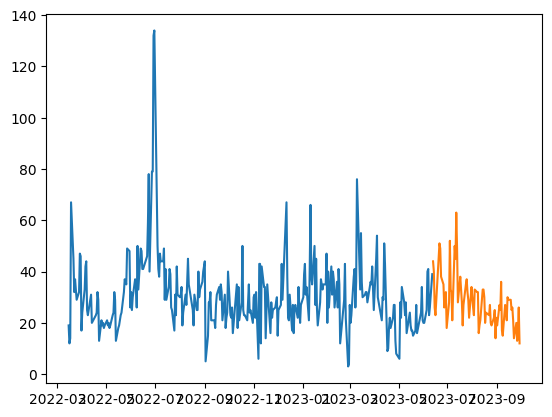

In [187]:
# Seleccionamos el primer 80% para train
train_WAPP = data["WAPP"][49:].iloc[:round(len(data["WAPP"][49:])*.80)]

# Seleccionamos el 20% restante para test
test_WAPP = data["WAPP"][49:].iloc[round(len(data["WAPP"][49:])*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
# print(train_WAPP, test_WAPP)

plt.plot(train_WAPP)
plt.plot(test_WAPP)

In [188]:
model_WAPP = sm.tsa.arima.ARIMA(train_WAPP, order=(2,0,1))
model_WAPP = model_WAPP.fit()
model_WAPP.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WAPP   No. Observations:                  304
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1187.497
Date:                Wed, 08 Nov 2023   AIC                           2384.994
Time:                        19:50:02   BIC                           2403.579
Sample:                             0   HQIC                          2392.429
                                - 304                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.0680      3.183      9.761      0.000      24.830      37.306
ar.L1          1.2159      0.203      5.998      0.000       0.819       1.613
ar.L2         -0.2879      0.136     -2.113      0.035      -0.555      -0.021
ma.L1         -0.7156      0.196     -3.652      0.000      -1.100      -0.332
sigma2       144.4330      7.142     20.222      0.000     130.435     158.432
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               407.20
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                             1.15
Prob(H) (two-sided):                  0.02   Kurtosis:                         8.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


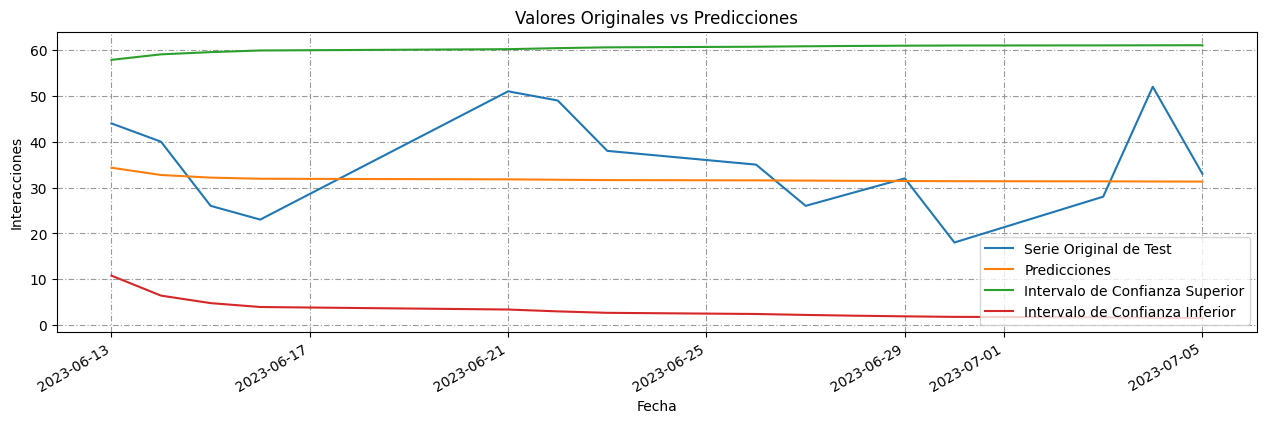

In [189]:
dias_estimar = 15

predicciones_WAPP = model_WAPP.get_forecast(dias_estimar)
WAPP_pred = predicciones_WAPP.predicted_mean
WAPP_int = predicciones_WAPP.conf_int()
WAPP_pred.index = test_WAPP[:dias_estimar].index
WAPP_int.index = test_WAPP[:dias_estimar].index
graficar_pred(test_WAPP[:dias_estimar], WAPP_pred, WAPP_int)

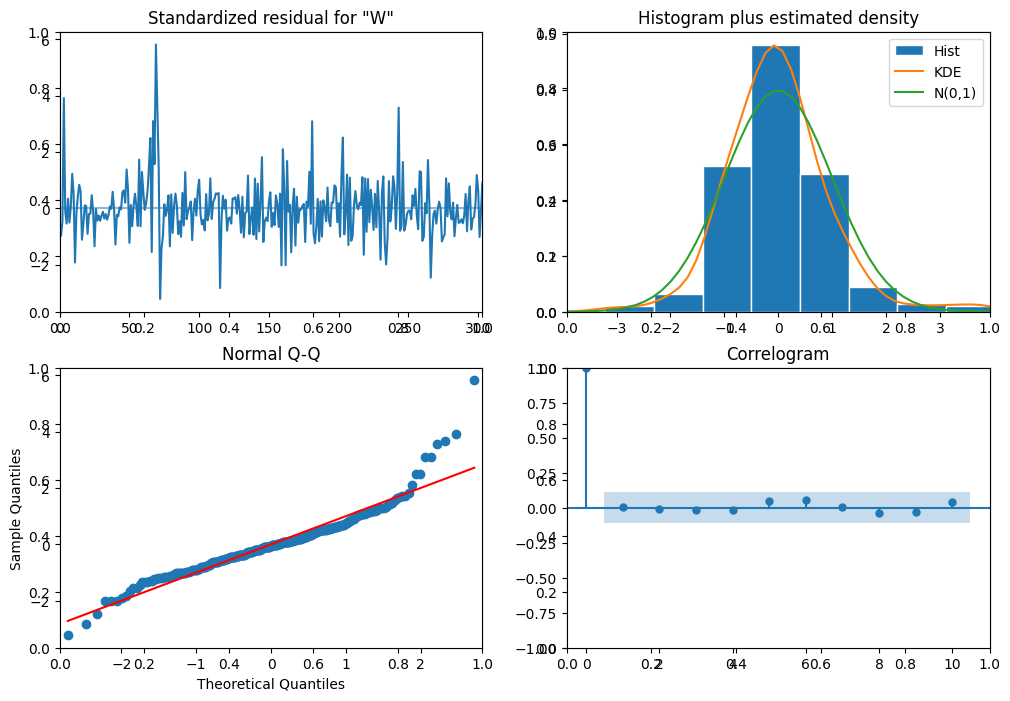

In [190]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
model_WAPP.plot_diagnostics(fig=fig)
plt.show()

In [197]:
metricas_WAPP_1 = evaluar_metricas(test_WAPP[:dias_estimar], WAPP_pred, "WAPP (2,0,1)(0,0,0)[0]")
metricas_WAPP_1

Model         MSE       MAE       RMSE      MAPE
0  WAPP (2,0,1)(0,0,0)[0]  109.515776  8.401762  10.464979  0.243315

In [192]:
# ARIMA (1,0,2)(0,0,0)[0]
model_WAPP_2 = sm.tsa.arima.ARIMA(train_WAPP, order=(1,0,2))
model_WAPP_2 = model_WAPP_2.fit()
model_WAPP_2.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WAPP   No. Observations:                  304
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1187.641
Date:                Wed, 08 Nov 2023   AIC                           2385.282
Time:                        19:51:31   BIC                           2403.867
Sample:                             0   HQIC                          2392.717
                                - 304                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.0608      3.084     10.073      0.000      25.017      37.105
ar.L1          0.8734      0.061     14.387      0.000       0.754       0.992
ma.L1         -0.3739      0.082     -4.571      0.000      -0.534      -0.214
ma.L2         -0.1428      0.071     -2.019      0.044      -0.281      -0.004
sigma2       144.5567      6.973     20.730      0.000     130.889     158.224
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               432.16
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                             1.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


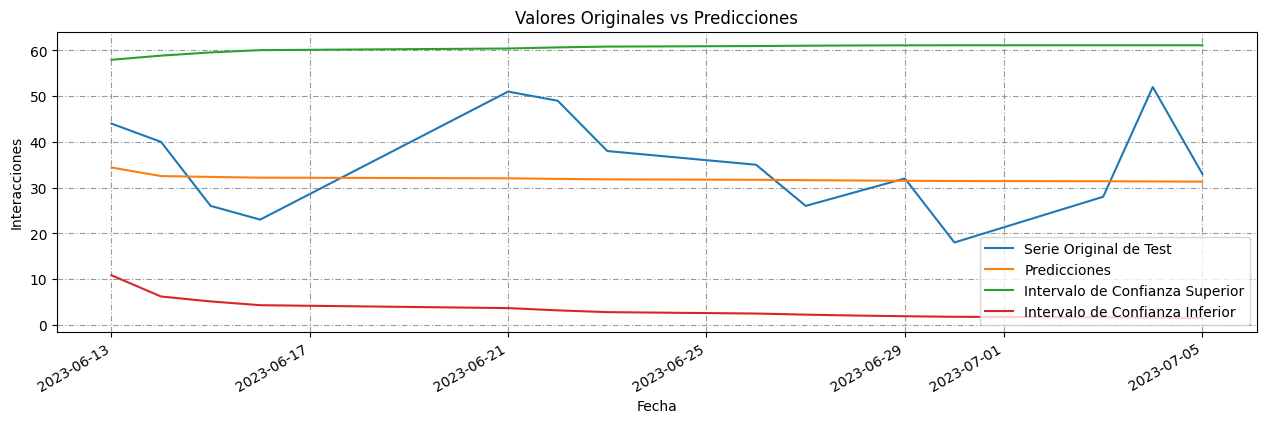

In [194]:
dias_estimar = 15

predicciones_WAPP_2 = model_WAPP_2.get_forecast(dias_estimar)
WAPP_pred_2 = predicciones_WAPP_2.predicted_mean
WAPP_int_2 = predicciones_WAPP_2.conf_int()
WAPP_pred_2.index = test_WAPP[:dias_estimar].index
WAPP_int_2.index = test_WAPP[:dias_estimar].index
graficar_pred(test_WAPP[:dias_estimar], WAPP_pred_2, WAPP_int_2)

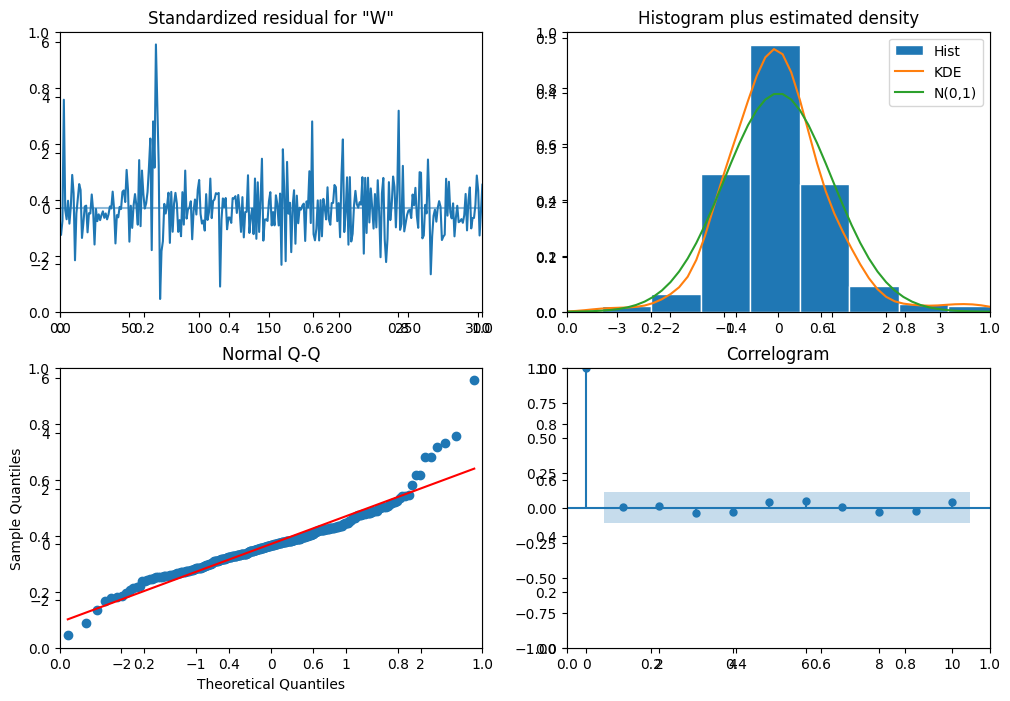

In [193]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
model_WAPP_2.plot_diagnostics(fig=fig)
plt.show()

In [198]:
metricas_WAPP_2 = evaluar_metricas(test_WAPP[:dias_estimar], WAPP_pred_2, "WAPP (1,0,2)(0,0,0)[0]")
metricas_WAPP_2

Model         MSE       MAE       RMSE      MAPE
0  WAPP (1,0,2)(0,0,0)[0]  108.887786  8.399629  10.434931  0.244132

In [199]:
pd.concat([metricas_WAPP_1, metricas_WAPP_2], ignore_index=True)

Model         MSE       MAE       RMSE      MAPE
0  WAPP (2,0,1)(0,0,0)[0]  109.515776  8.401762  10.464979  0.243315
1  WAPP (1,0,2)(0,0,0)[0]  108.887786  8.399629  10.434931  0.244132

### **TURNOS PRESENCIALES (TP)**

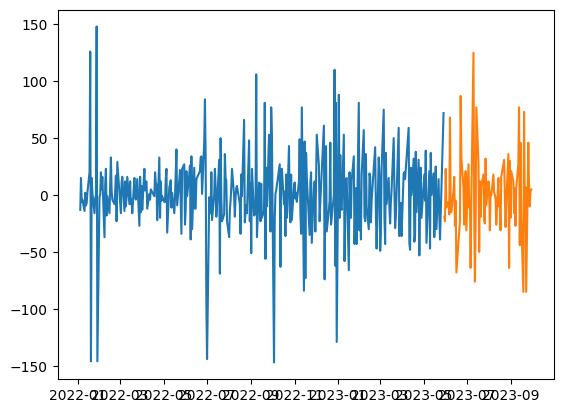

In [200]:
# Seleccionamos el primer 80% para train
train_TP = data_diff_TP.iloc[:round(len(data_diff_TP)*.80)]

# Seleccionamos el 20% restante para test
test_TP = data_diff_TP.iloc[round(len(data_diff_TP)*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
# print(train_TP, test_TP)

plt.plot(train_TP)
plt.plot(test_TP)

In [204]:
auto_TP

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [201]:
model_TP = sm.tsa.arima.ARIMA(train_TP, order=(1,0,1))
model_TP = model_TP.fit()
model_TP.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     TP   No. Observations:                  342
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1676.777
Date:                Wed, 08 Nov 2023   AIC                           3361.553
Time:                        19:55:31   BIC                           3376.892
Sample:                             0   HQIC                          3367.664
                                - 342                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3353      0.645      0.520      0.603      -0.928       1.599
ar.L1          0.2938      0.052      5.628      0.000       0.191       0.396
ma.L1         -0.7732      0.033    -23.492      0.000      -0.838      -0.709
sigma2      1060.4171     54.464     19.470      0.000     953.670    1167.164
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               160.79
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                             0.59
Prob(H) (two-sided):                  0.06   Kurtosis:                         6.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


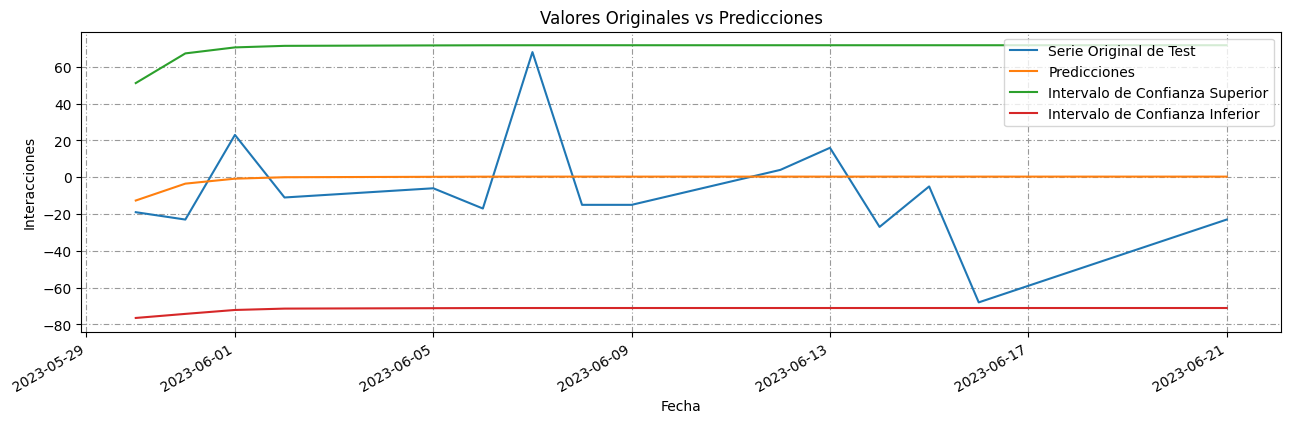

In [202]:
dias_estimar = 15

predicciones_TP = model_TP.get_forecast(dias_estimar)
TP_pred = predicciones_TP.predicted_mean
TP_int = predicciones_TP.conf_int()
TP_pred.index = test_TP[:dias_estimar].index
TP_int.index = test_TP[:dias_estimar].index
graficar_pred(test_TP[:dias_estimar], TP_pred, TP_int)

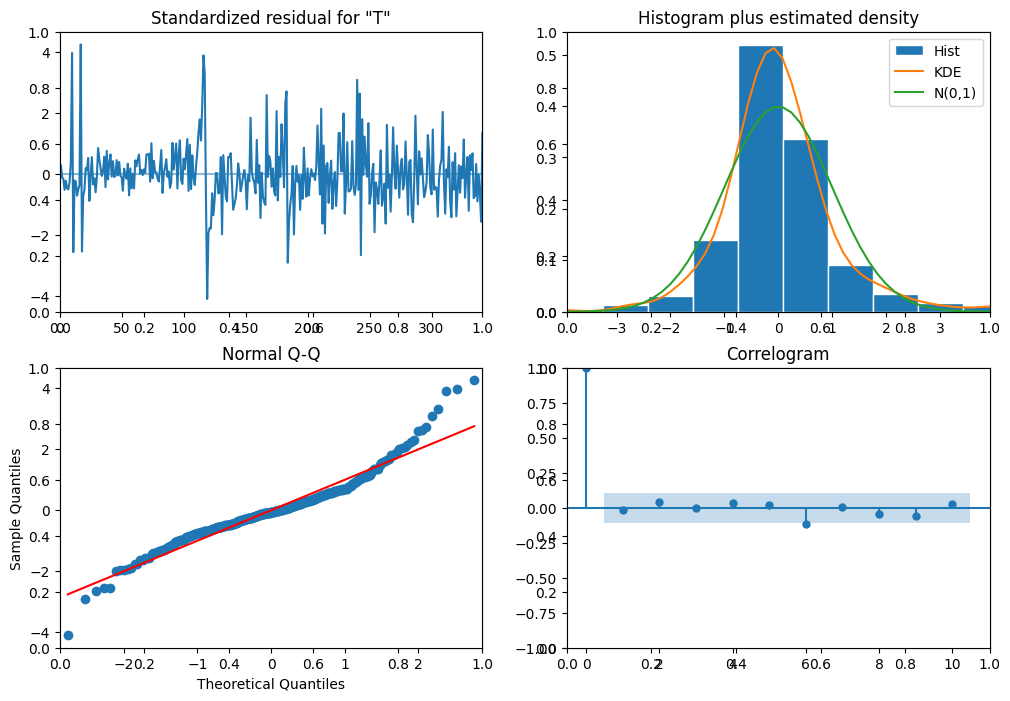

In [203]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
model_TP.plot_diagnostics(fig=fig)
plt.show()

In [205]:
metricas_TP_1 = evaluar_metricas(test_TP[:dias_estimar], TP_pred, "TP (1,0,1)(0,0,0)[0]")
metricas_TP_1

Model         MSE        MAE       RMSE      MAPE
0  TP (1,0,1)(0,0,0)[0]  849.686906  21.747809  29.149389  0.953953

In [206]:
#(1,0,2)(0,0,0)[0]
model_TP_2 = sm.tsa.arima.ARIMA(train_TP, order=(1,0,2))
model_TP_2 = model_TP_2.fit()
model_TP_2.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     TP   No. Observations:                  342
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1675.813
Date:                Wed, 08 Nov 2023   AIC                           3361.626
Time:                        19:59:54   BIC                           3380.800
Sample:                             0   HQIC                          3369.265
                                - 342                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3526      0.549      0.642      0.521      -0.724       1.429
ar.L1          0.6651      0.180      3.705      0.000       0.313       1.017
ma.L1         -1.1663      0.189     -6.171      0.000      -1.537      -0.796
ma.L2          0.2560      0.127      2.023      0.043       0.008       0.504
sigma2      1054.3112     53.805     19.595      0.000     948.855    1159.768
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               173.60
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             0.62
Prob(H) (two-sided):                  0.08   Kurtosis:                         6.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


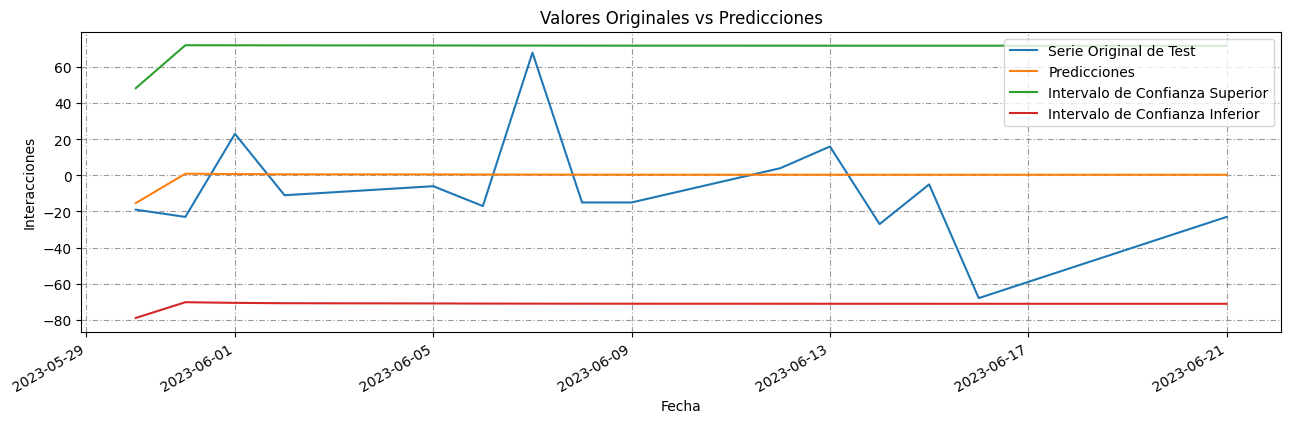

In [207]:
dias_estimar = 15

predicciones_TP_2 = model_TP_2.get_forecast(dias_estimar)
TP_pred_2 = predicciones_TP_2.predicted_mean
TP_int_2 = predicciones_TP_2.conf_int()
TP_pred_2.index = test_TP[:dias_estimar].index
TP_int_2.index = test_TP[:dias_estimar].index
graficar_pred(test_TP[:dias_estimar], TP_pred_2, TP_int_2)

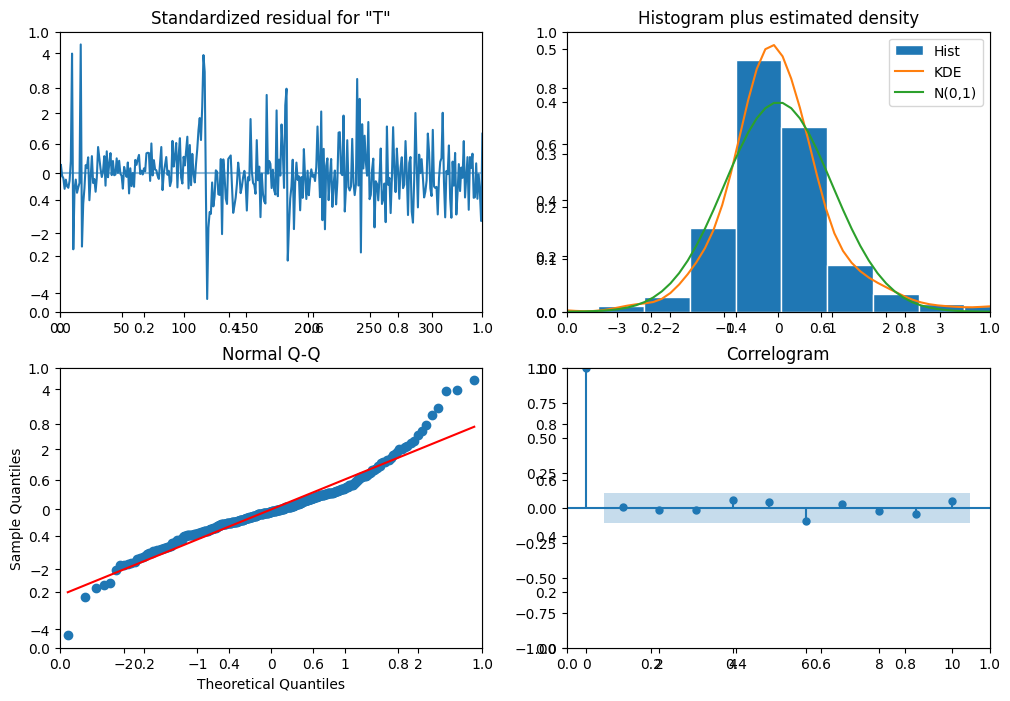

In [208]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
model_TP_2.plot_diagnostics(fig=fig)
plt.show()

In [211]:
metricas_TP_2 = evaluar_metricas(test_TP[:dias_estimar], TP_pred_2, "TP (1,0,2)(0,0,0)[0]")
metricas_TP_2

Model         MSE        MAE       RMSE      MAPE
0  TP (1,0,2)(0,0,0)[0]  857.118252  21.831984  29.276582  0.960316

In [212]:
pd.concat([metricas_TP_1, metricas_TP_2], ignore_index=True)

Model         MSE        MAE       RMSE      MAPE
0  TP (1,0,1)(0,0,0)[0]  849.686906  21.747809  29.149389  0.953953
1  TP (1,0,2)(0,0,0)[0]  857.118252  21.831984  29.276582  0.960316

### **TRAMITES A DISTANCIA (TAD)**

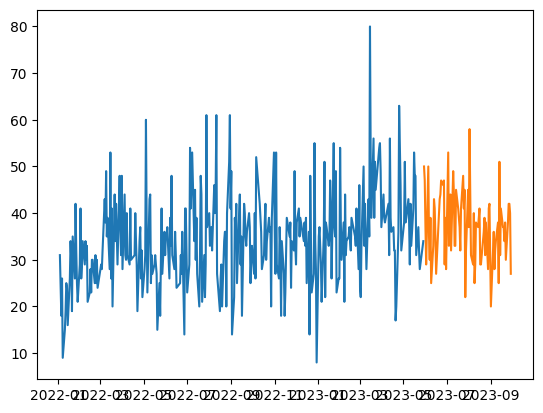

In [214]:
# Seleccionamos el primer 80% para train
train_TAD= data["TAD"].iloc[:round(len(data["TAD"])*.80)]

# Seleccionamos el 20% restante para test
test_TAD = data["TAD"].iloc[round(len(data["TAD"])*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
# print(train_WAPP, test_WAPP)

plt.plot(train_TAD)
plt.plot(test_TAD)

In [215]:
auto_TAD

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True)

In [216]:
model_TAD = sm.tsa.arima.ARIMA(train_TAD, order=(1,0,1))
model_TAD = model_TAD.fit()
model_TAD.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    TAD   No. Observations:                  343
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1261.191
Date:                Wed, 08 Nov 2023   AIC                           2530.382
Time:                        20:01:02   BIC                           2545.733
Sample:                             0   HQIC                          2536.497
                                - 343                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.2445      1.536     22.293      0.000      31.234      37.255
ar.L1          0.9442      0.037     25.216      0.000       0.871       1.018
ma.L1         -0.8371      0.056    -15.007      0.000      -0.946      -0.728
sigma2        91.3941      5.623     16.253      0.000      80.373     102.415
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                46.72
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               1.67   Skew:                             0.57
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


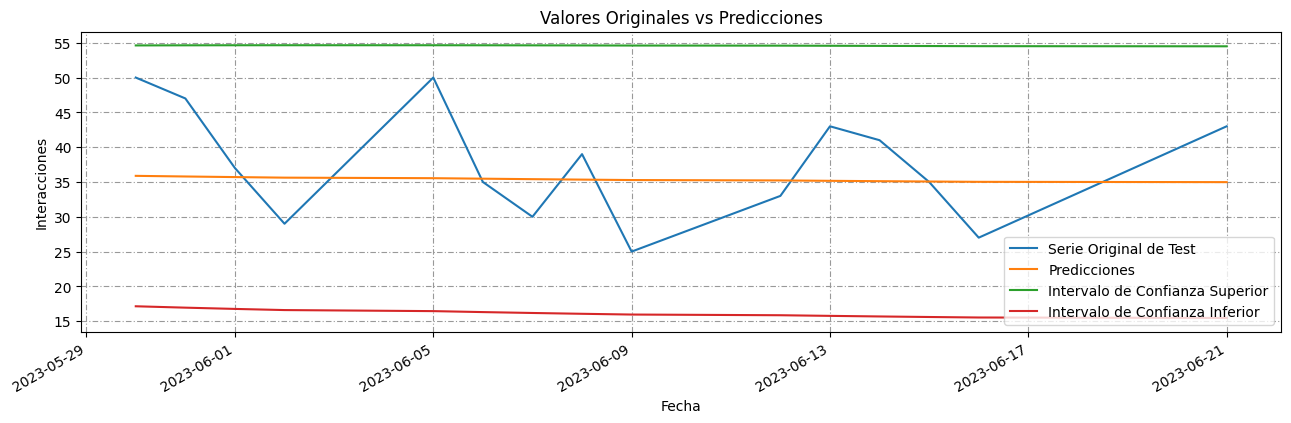

In [217]:
dias_estimar = 15

predicciones_TAD = model_TAD.get_forecast(dias_estimar)
TAD_pred = predicciones_TAD.predicted_mean
TAD_int = predicciones_TAD.conf_int()
TAD_pred.index = test_TAD[:dias_estimar].index
TAD_int.index = test_TAD[:dias_estimar].index
graficar_pred(test_TAD[:dias_estimar], TAD_pred, TAD_int)

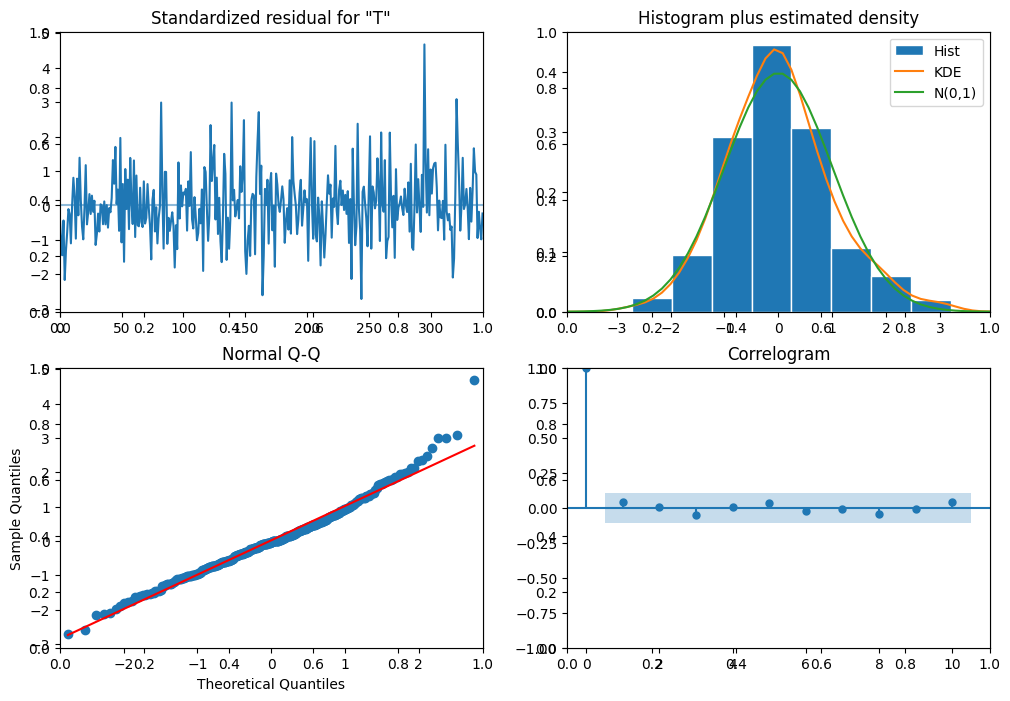

In [218]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
model_TAD.plot_diagnostics(fig=fig)
plt.show()

In [219]:
metricas_TAD_1 = evaluar_metricas(test_TAD[:dias_estimar], TAD_pred, "TAD (1,0,1)(0,0,0)[0]")
metricas_TAD_1

Model        MSE      MAE      RMSE      MAPE
0  TAD (1,0,1)(0,0,0)[0]  63.845118  6.63799  7.990314  0.176704

In [220]:
#(1,0,2)(0,0,0)[0]
model_TAD_2 = sm.tsa.arima.ARIMA(train_TAD, order=(1,0,2))
model_TAD_2 = model_TAD_2.fit()
model_TAD_2.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    TAD   No. Observations:                  343
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1260.636
Date:                Wed, 08 Nov 2023   AIC                           2531.272
Time:                        20:03:47   BIC                           2550.460
Sample:                             0   HQIC                          2538.915
                                - 343                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.0787      1.995     17.081      0.000      30.168      37.989
ar.L1          0.9739      0.022     44.159      0.000       0.931       1.017
ma.L1         -0.8336      0.063    -13.300      0.000      -0.956      -0.711
ma.L2         -0.0635      0.057     -1.124      0.261      -0.174       0.047
sigma2        91.0594      5.617     16.211      0.000      80.050     102.068
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                42.90
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             0.55
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


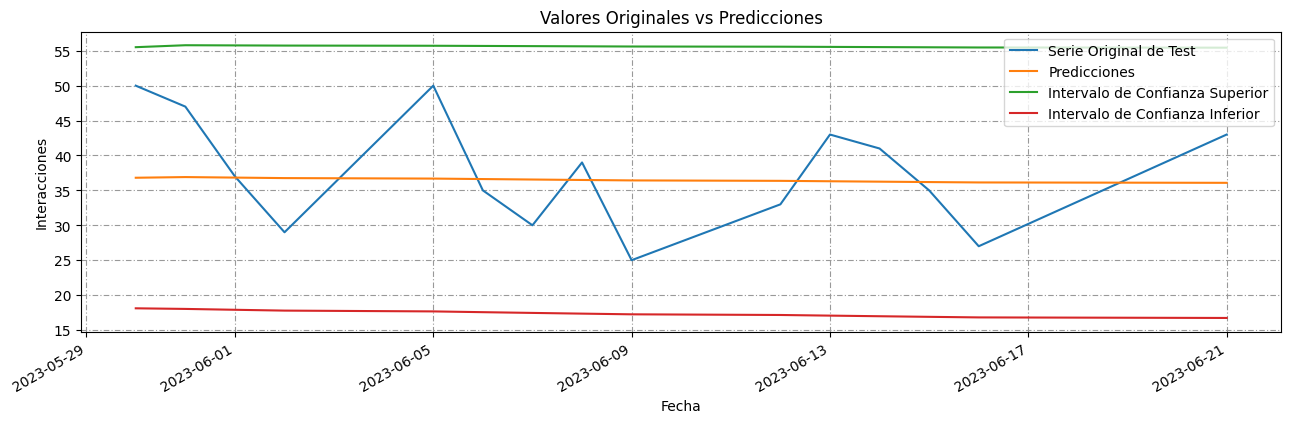

In [221]:
dias_estimar = 15

predicciones_TAD_2 = model_TAD_2.get_forecast(dias_estimar)
TAD_pred_2 = predicciones_TAD_2.predicted_mean
TAD_int_2 = predicciones_TAD_2.conf_int()
TAD_pred_2.index = test_TAD[:dias_estimar].index
TAD_int_2.index = test_TAD[:dias_estimar].index
graficar_pred(test_TAD[:dias_estimar], TAD_pred_2, TAD_int_2)

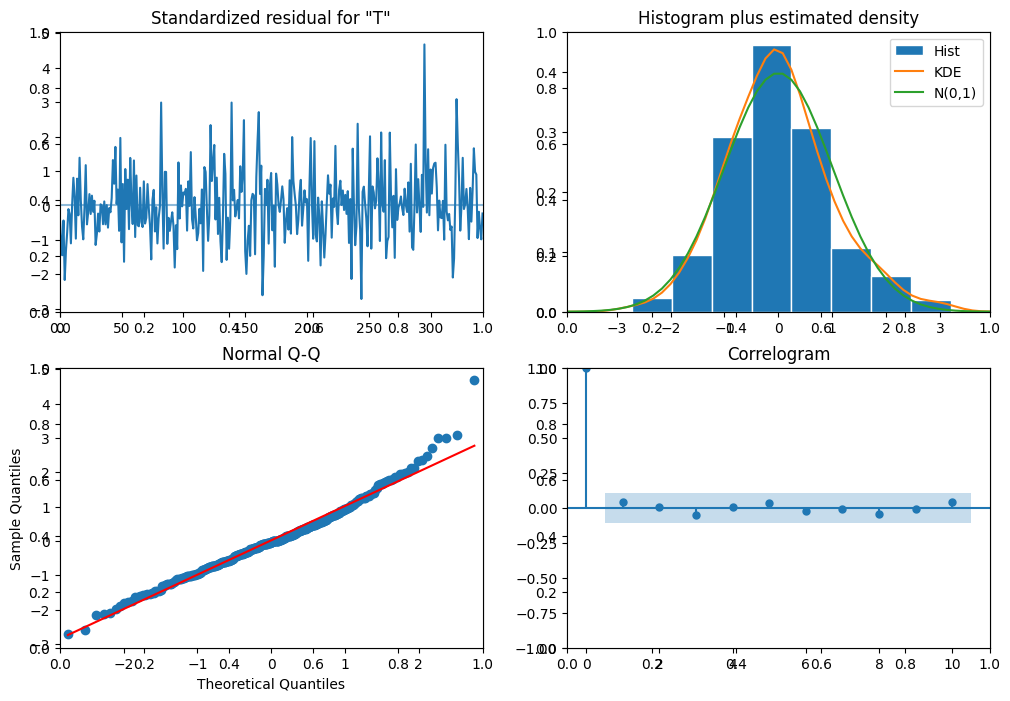

In [222]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
model_TAD.plot_diagnostics(fig=fig)
plt.show()

In [223]:
metricas_TAD_2 = evaluar_metricas(test_TAD[:dias_estimar], TAD_pred_2, "TAD (1,0,2)(0,0,0)[0]")
metricas_TAD_2

Model        MSE       MAE      RMSE      MAPE
0  TAD (1,0,2)(0,0,0)[0]  60.480691  6.579552  7.776933  0.180675

In [224]:
pd.concat([metricas_TAD_1, metricas_TAD_2], ignore_index=True)

Model        MSE       MAE      RMSE      MAPE
0  TAD (1,0,1)(0,0,0)[0]  63.845118  6.637990  7.990314  0.176704
1  TAD (1,0,2)(0,0,0)[0]  60.480691  6.579552  7.776933  0.180675

### **PLAN DE PAGOS (PP)**

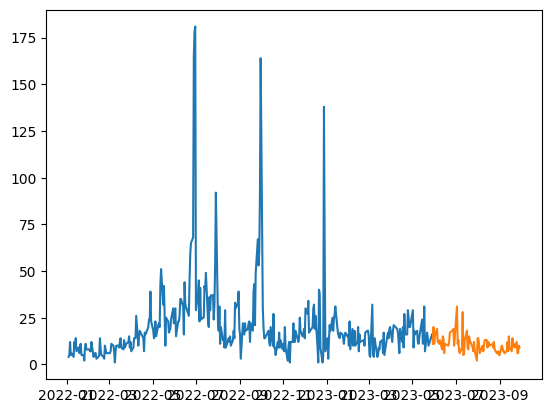

In [227]:
# Seleccionamos el primer 80% para train
train_PP = data["PP"].iloc[:round(len(data["PP"])*.80)]

# Seleccionamos el 20% restante para test
test_PP = data["PP"].iloc[round(len(data["PP"])*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
# print(train_WAPP, test_WAPP)

plt.plot(train_PP)
plt.plot(test_PP)

In [228]:
auto_PP

ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True)

In [229]:
model_PP = sm.tsa.arima.ARIMA(train_PP, order=(2,0,1))
model_PP = model_PP.fit()
model_PP.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     PP   No. Observations:                  343
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1453.296
Date:                Wed, 08 Nov 2023   AIC                           2916.592
Time:                        20:07:23   BIC                           2935.780
Sample:                             0   HQIC                          2924.235
                                - 343                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8052      7.962      2.487      0.013       4.200      35.410
ar.L1          1.4741      0.102     14.494      0.000       1.275       1.673
ar.L2         -0.4967      0.078     -6.343      0.000      -0.650      -0.343
ma.L1         -0.8903      0.087    -10.186      0.000      -1.062      -0.719
sigma2       279.8658      7.937     35.262      0.000     264.310     295.422
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              7914.22
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               4.66   Skew:                             2.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


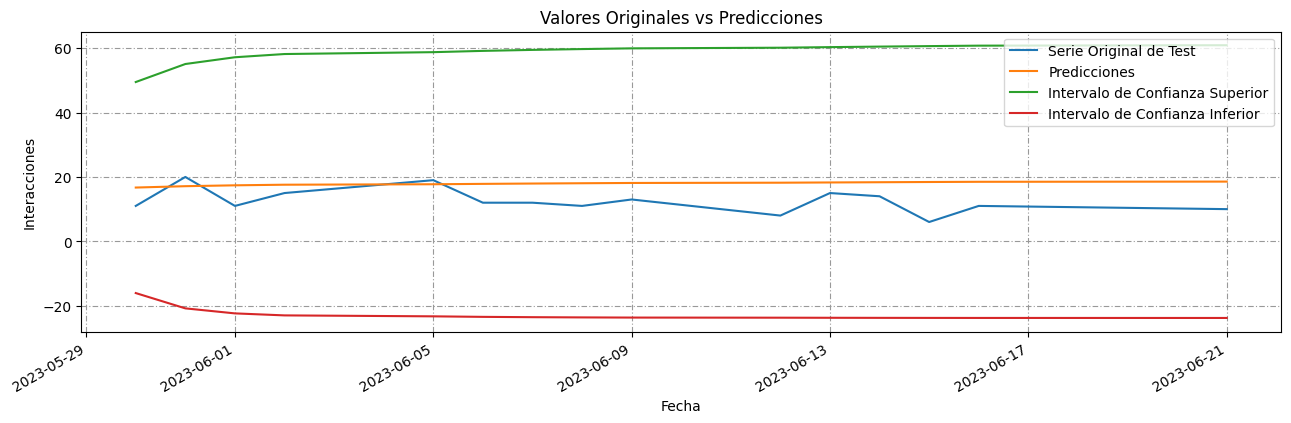

In [230]:
dias_estimar = 15

predicciones_PP = model_PP.get_forecast(dias_estimar)
PP_pred = predicciones_PP.predicted_mean
PP_int = predicciones_PP.conf_int()
PP_pred.index = test_PP[:dias_estimar].index
PP_int.index = test_PP[:dias_estimar].index
graficar_pred(test_PP[:dias_estimar], PP_pred, PP_int)

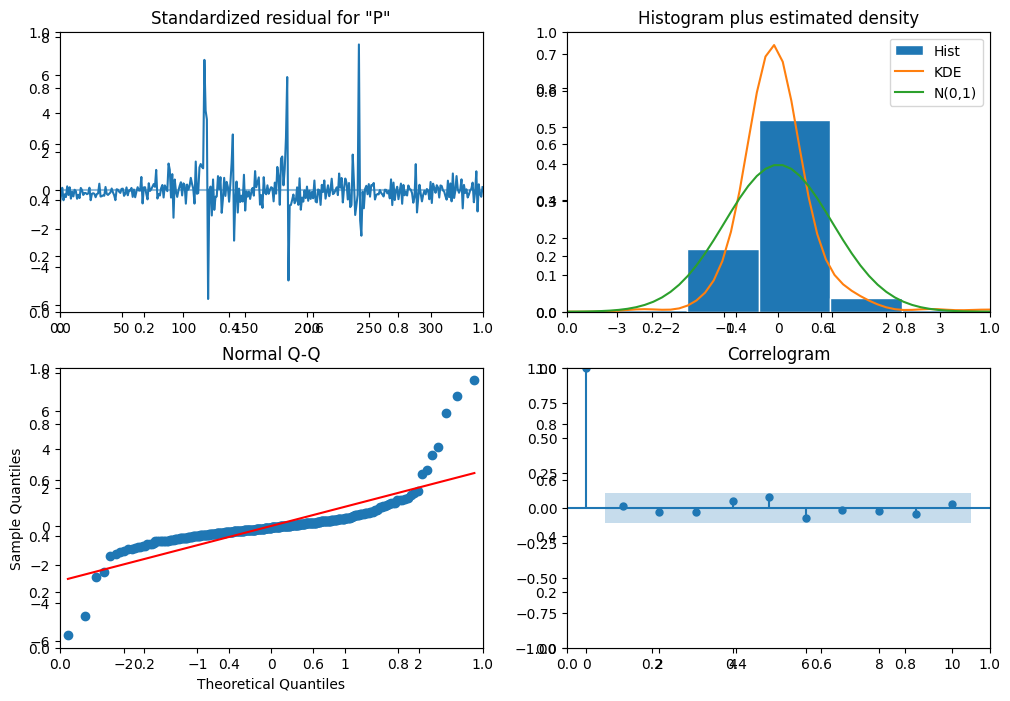

In [231]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
model_PP.plot_diagnostics(fig=fig)
plt.show()

In [232]:
metricas_PP_1 = evaluar_metricas(test_PP[:dias_estimar], PP_pred, "PP (2,0,1)(0,0,0)[0]")
metricas_PP_1

Model        MSE       MAE     RMSE      MAPE
0  PP (2,0,1)(0,0,0)[0]  43.588256  5.944304  6.60214  0.594593

In [233]:
# (2,0,2)(0,0,0)[0]
model_PP_2 = sm.tsa.arima.ARIMA(train_PP, order=(2,0,2))
model_PP_2 = model_PP_2.fit()
model_PP_2.summary()

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     PP   No. Observations:                  343
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1453.117
Date:                Wed, 08 Nov 2023   AIC                           2918.233
Time:                        20:07:29   BIC                           2941.260
Sample:                             0   HQIC                          2927.405
                                - 343                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9524      7.634      2.614      0.009       4.989      34.915
ar.L1          1.3767      0.191      7.220      0.000       1.003       1.750
ar.L2         -0.4098      0.158     -2.597      0.009      -0.719      -0.101
ma.L1         -0.7790      0.191     -4.088      0.000      -1.153      -0.406
ma.L2         -0.0672      0.081     -0.830      0.406      -0.226       0.091
sigma2       279.5759      8.006     34.921      0.000     263.884     295.267
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7779.65
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               4.56   Skew:                             2.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


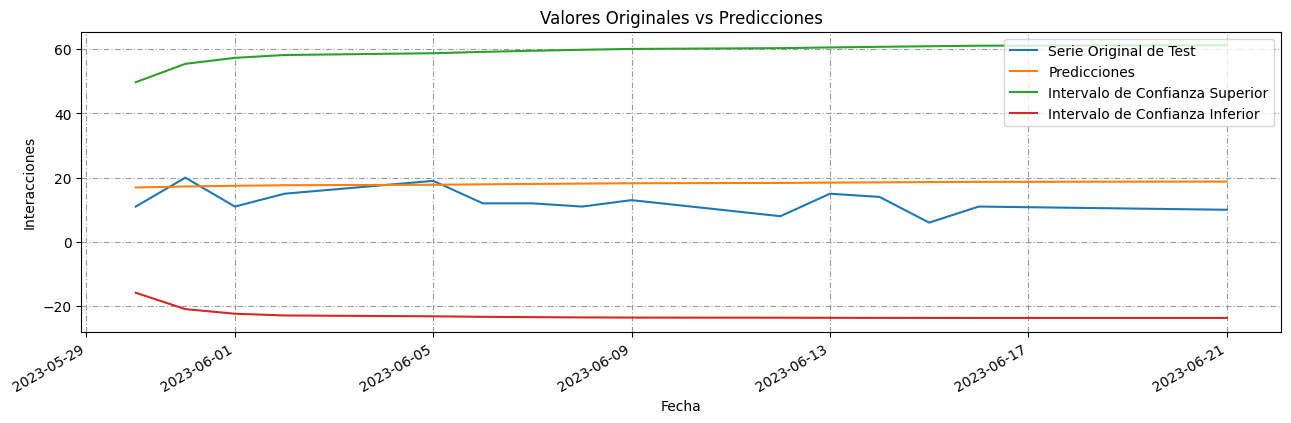

In [234]:
dias_estimar = 15

predicciones_PP_2 = model_PP_2.get_forecast(dias_estimar)
PP_pred_2 = predicciones_PP_2.predicted_mean
PP_int_2 = predicciones_PP_2.conf_int()
PP_pred_2.index = test_PP[:dias_estimar].index
PP_int_2.index = test_PP[:dias_estimar].index
graficar_pred(test_PP[:dias_estimar], PP_pred_2, PP_int_2)

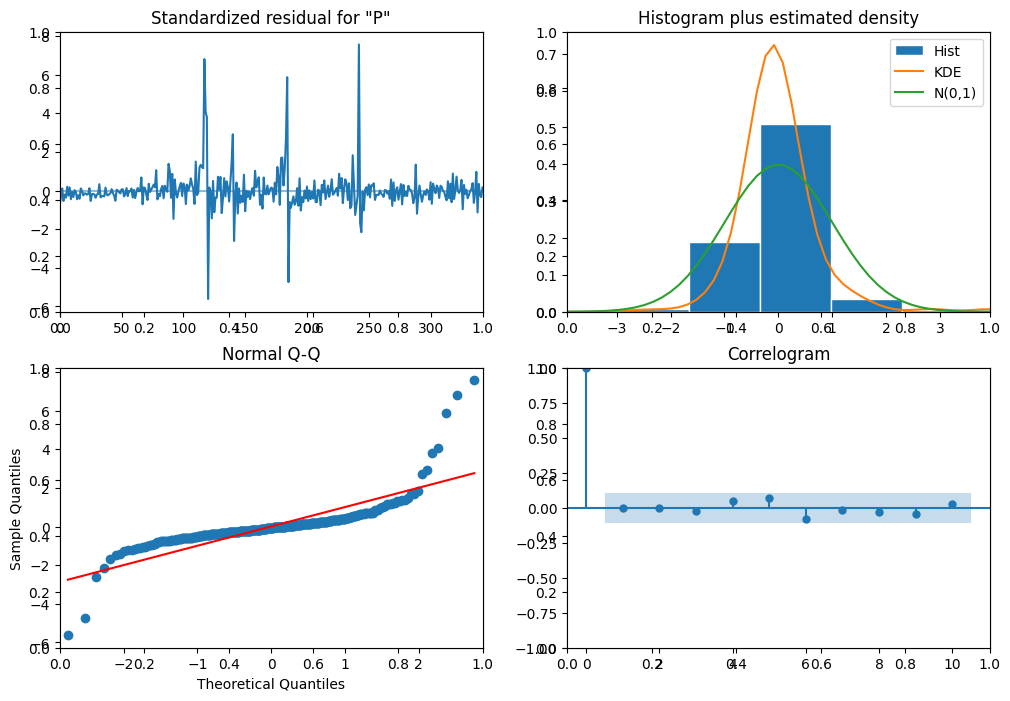

In [235]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
model_PP_2.plot_diagnostics(fig=fig)
plt.show()

In [237]:
metricas_PP_2 = evaluar_metricas(test_PP[:dias_estimar], PP_pred_2, "PP (2,0,2)(0,0,0)[0]")
metricas_PP_2

Model        MSE       MAE      RMSE      MAPE
0  PP (2,0,2)(0,0,0)[0]  45.228808  6.053169  6.725237  0.605607

In [238]:
pd.concat([metricas_PP_1, metricas_PP_2], ignore_index=True)

Model        MSE       MAE      RMSE      MAPE
0  PP (2,0,1)(0,0,0)[0]  43.588256  5.944304  6.602140  0.594593
1  PP (2,0,2)(0,0,0)[0]  45.228808  6.053169  6.725237  0.605607

### Resumen modelos AUTOARIMA

In [239]:
pd.concat([
    metricas_CC_1,
    metricas_CC_2,
    metricas_WAPP_1,
    metricas_WAPP_2,
    metricas_TP_1,
    metricas_TP_2,
    metricas_TAD_1,
    metricas_TAD_2,
    metricas_PP_1, 
    metricas_PP_2
    ], 
    ignore_index=True
    )

Model         MSE        MAE       RMSE      MAPE
0    CC (3,0,3)(1,0,1)[7]  104.022581   7.606993  10.199146       inf
1    CC (3,0,3)(0,0,1)[7]  102.721870   7.612438  10.135180       inf
2  WAPP (2,0,1)(0,0,0)[0]  109.515776   8.401762  10.464979  0.243315
3  WAPP (1,0,2)(0,0,0)[0]  108.887786   8.399629  10.434931  0.244132
4    TP (1,0,1)(0,0,0)[0]  849.686906  21.747809  29.149389  0.953953
5    TP (1,0,2)(0,0,0)[0]  857.118252  21.831984  29.276582  0.960316
6   TAD (1,0,1)(0,0,0)[0]   63.845118   6.637990   7.990314  0.176704
7   TAD (1,0,2)(0,0,0)[0]   60.480691   6.579552   7.776933  0.180675
8    PP (2,0,1)(0,0,0)[0]   43.588256   5.944304   6.602140  0.594593
9    PP (2,0,2)(0,0,0)[0]   45.228808   6.053169   6.725237  0.605607

---
### **COMPARAR CON OTROS MODELOS**

------
Hacer phillip terron  para ver estacionariedad → ok

Hacer cuadro comparativo de todos los tests → OK

HACER DIFERENCIACION CUANDO CORRESPONDA → OK

REALIZAR DIFERENTES MODELOS SARIMA - AUTO SARIMA. SE PODRIA UTILIZAR EL METODO GRAFICO PARA DETERMINAR EL MODELO PREVIO A USAR AUTOSARIMA

EVALUAR LA METRICA DEL MODELO AIC, HANNA QUINN, ETC PARA VER SI EL MODELO ES BUENO
DESPUES USAMOS AUTO ARIMA Y CONFIRMAMOS

6. EVALUAR PERFORMANCE TRAIN/TEST → MAE, MAPE, RMSE, 

7. COMPARAR CON OTROS MODELOS ESTIMADOS (NAIVE, DRIFT, MEDIAS, O CON OTRO SARIMA)

8. ANALISIS DIAGNOSTICO DEL MODELO (RESIDUOS NORMALIDAD (QQPLOT), HOMOCEDASTICIDAD, ) TEST JAQUE BERA

9. PRONOSTICAR Y LUEGO COMPARAMOS CON EL TEST → 1, 5, 10, 15 Y 30 DIAS PARA PROBAR

10. VAR ??




